In [31]:
from pandas import read_csv, DataFrame
from sklearn.ensemble import IsolationForest
from matplotlib import pyplot
pyplot.rcParams["figure.figsize"] = (20,10)

In [32]:
csvs = ['../../data_set2/data_age_based.csv',
        '../../data_set2/data_hospital.csv',
           '../../data_set2/data_response_measures.csv',
               '../../data_set2/data_testing.csv',
           '../../data_set2/data_vaccine.csv']
datasets = []
csv = csvs[3]
data = read_csv(csv, index_col=2, parse_dates=True, squeeze=True)
datasets.append(data)
# data.plot()
# print(csv)
# print(data.shape)
# pyplot.show()

           new_cases  tests_done
year_week                       
2020-W18        7635      315608
2020-W19        8565      274081
2020-W20        3836      294200
2020-W21        3794      302086
2020-W22        4238      314737
2020-W23        2079      286646
2020-W24        2392      238858
2020-W25        2395      228650
2020-W26        2466      179742
2020-W27        2819      174328
2020-W28        4164      205243
2020-W29        8883      223963
2020-W30       13946      273358
2020-W31       18272      305471
2020-W32       25926      331442
2020-W33       36102      383376
2020-W34       46354      482628
2020-W35       57422      566594
2020-W36       62691      626262
2020-W37       68181      856605
2020-W38       77738      683322
2020-W39       76798      756205
2020-W40       65146      782325
2020-W41       75556      796417
2020-W42       85481      829266
2020-W43      123871     1073926
2020-W44      142377     1220897
2020-W45      140521     1147694
2020-W46  

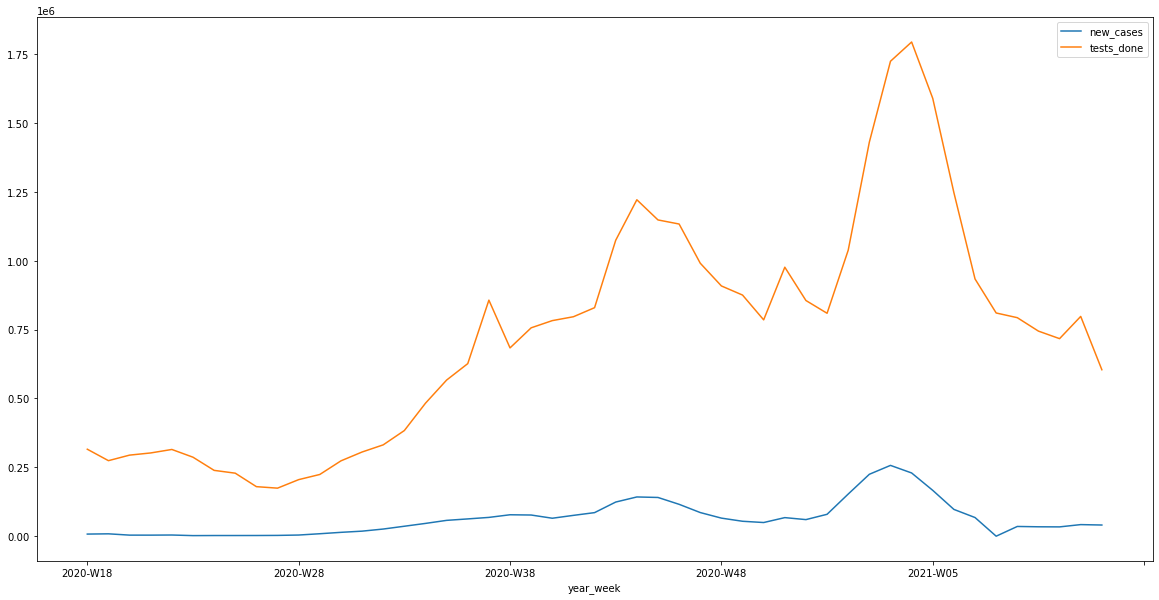

In [33]:
dataset_number = 0
country_code = 'ES'
working_dataset = datasets[dataset_number][dataset['country_code']==country_code].copy().drop('country', axis='columns').drop('country_code', axis='columns').drop('level', axis='columns').drop('region', axis='columns').drop('region_name', axis='columns').drop('population', axis='columns').drop('testing_rate', axis='columns').drop('positivity_rate', axis='columns').drop('testing_data_source', axis='columns')

alg = IsolationForest(random_state=0)

print(working_dataset)
working_dataset.plot()
pyplot.show()

In [20]:
# ## TODO plot my counntry by dataset
# data_orig = datasets[dataset_number]
# data = data_orig.copy().drop('population', axis='columns')
# countrys = data.groupby(['country'])
# for country in countrys:
#     print(country[0])
#     country[1].plot()
#     pyplot.show()

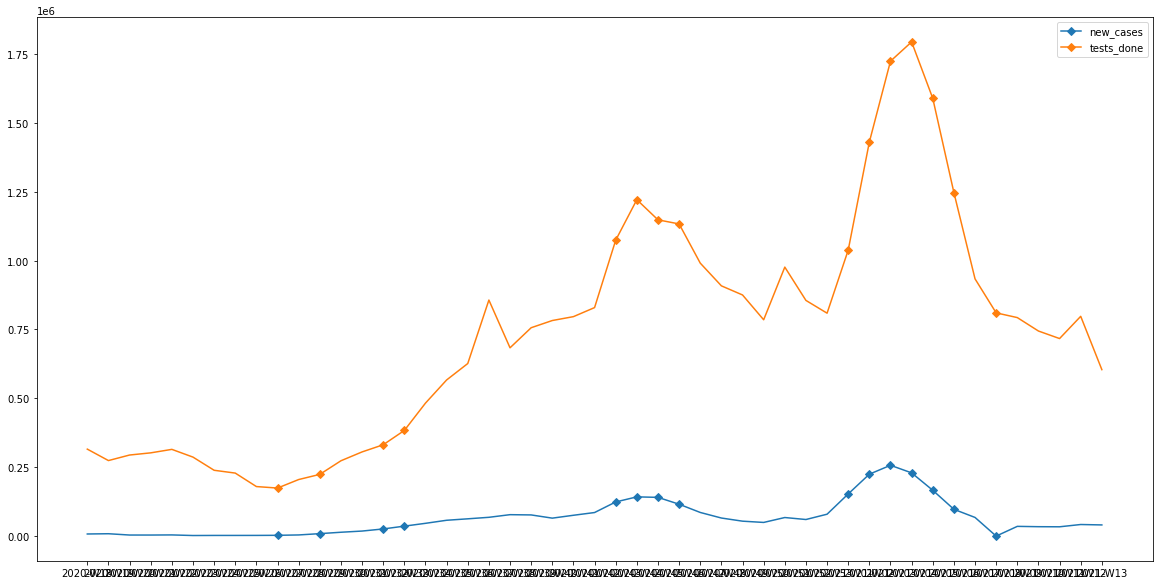

fit on all, predict on all
Number of outliers:
15
Wall time: 764 ms


In [34]:
%%time
#fit on all, predict on all
from sklearn.ensemble import IsolationForest

clf = alg.fit(working_dataset)
pred = clf.predict(working_dataset)
indices = [index for index, element in enumerate(pred) if element == -1]
pyplot.plot(working_dataset, '-D', markevery=indices)
pyplot.legend(['new_cases', 'tests_done'])
pyplot.show()
print("fit on all, predict on all")
print("Number of outliers:")
print(len(indices))

In [35]:
def split_dataframe(df, chunk_size = 100): 
    chunks = list()
    num_chunks = len(df) // chunk_size + 1
    for i in range(num_chunks):
        chunk = df[i*chunk_size:(i+1)*chunk_size]
        if len(chunk) > 0:
            chunks.append(chunk)
    return chunks

def join_dataframe(list_of_datraframes):
    df = DataFrame()
    for dataframe in list_of_datraframes:
        df = df.append(dataframe)
    return df

C:\Users\ioana\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:473: RuntimeWarning: invalid value encountered in true_divide
  -depths
C:\Users\ioana\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:336: RuntimeWarning: invalid value encountered in less
  is_inlier[self.decision_function(X) < 0] = -1


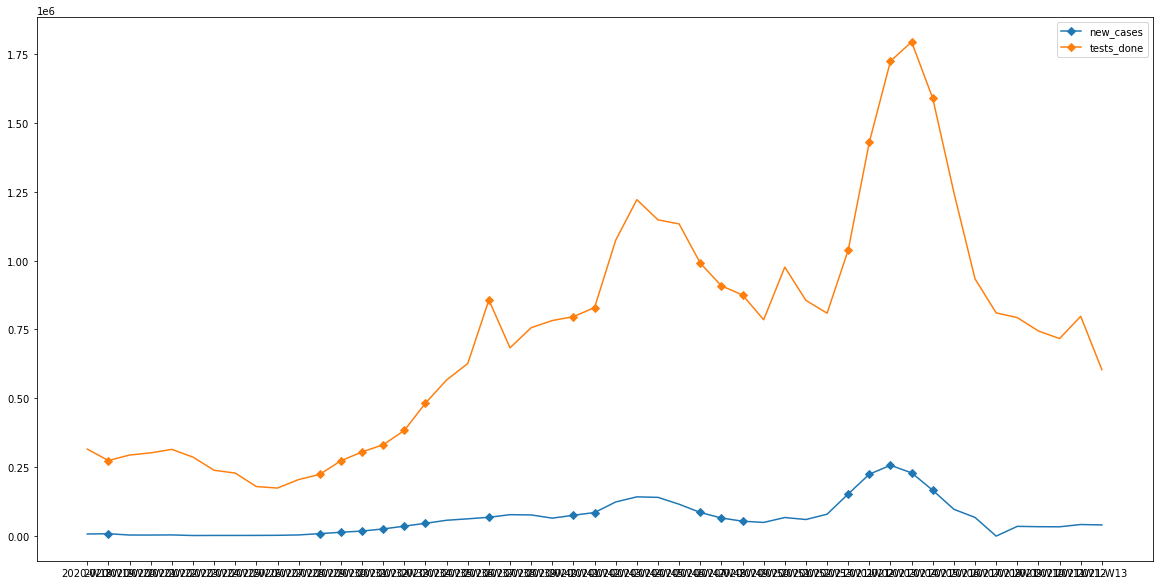

Wall time: 2.45 s


In [36]:
%%time
#fit on half a period, predict on period, period == chunck_size
from sklearn.ensemble import IsolationForest

#split in chuncks of x days
fit_size = 4
chunck_size = fit_size * 2
chuncks = split_dataframe(working_dataset, chunck_size)
pred = []

for chunck in chuncks:
    time_frame = split_dataframe(chunck, fit_size)
    clf = alg.fit(time_frame[0])
    pred.extend(clf.predict(chunck).tolist())
    
# -1 is an anomaly and 1 is ok
indices = [index for index, element in enumerate(pred) if element == -1]
pyplot.plot(working_dataset, '-D', markevery=indices)
pyplot.legend(['new_cases', 'tests_done'])
pyplot.show()

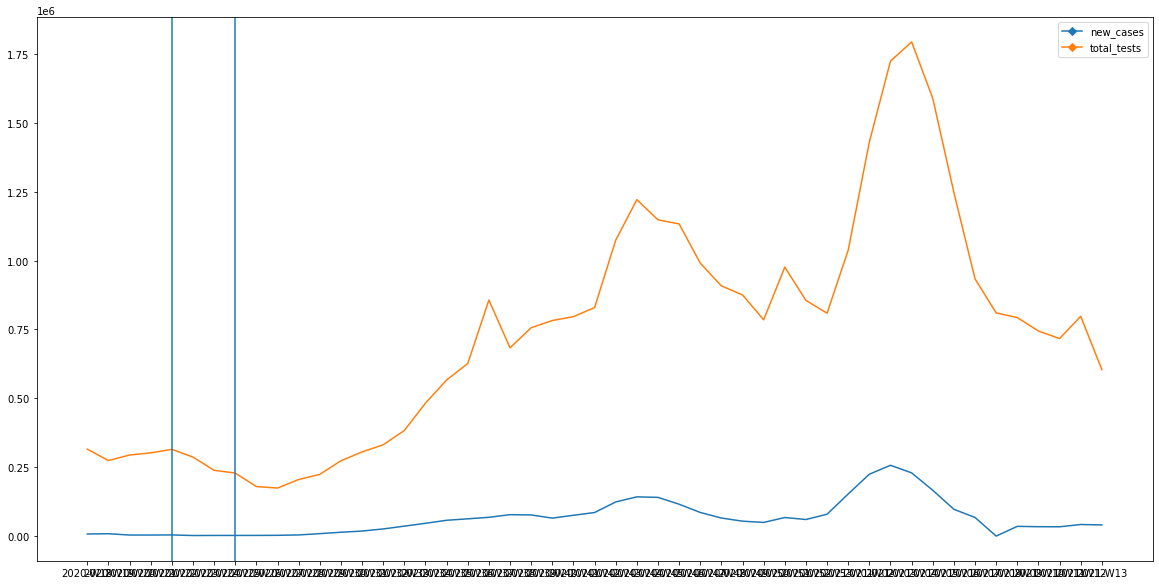

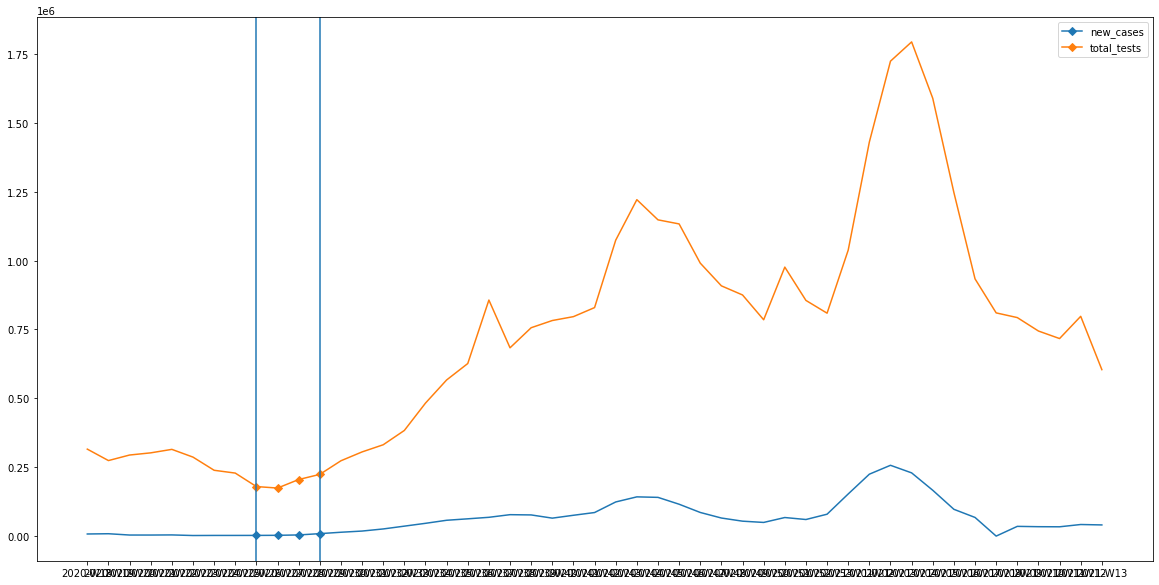

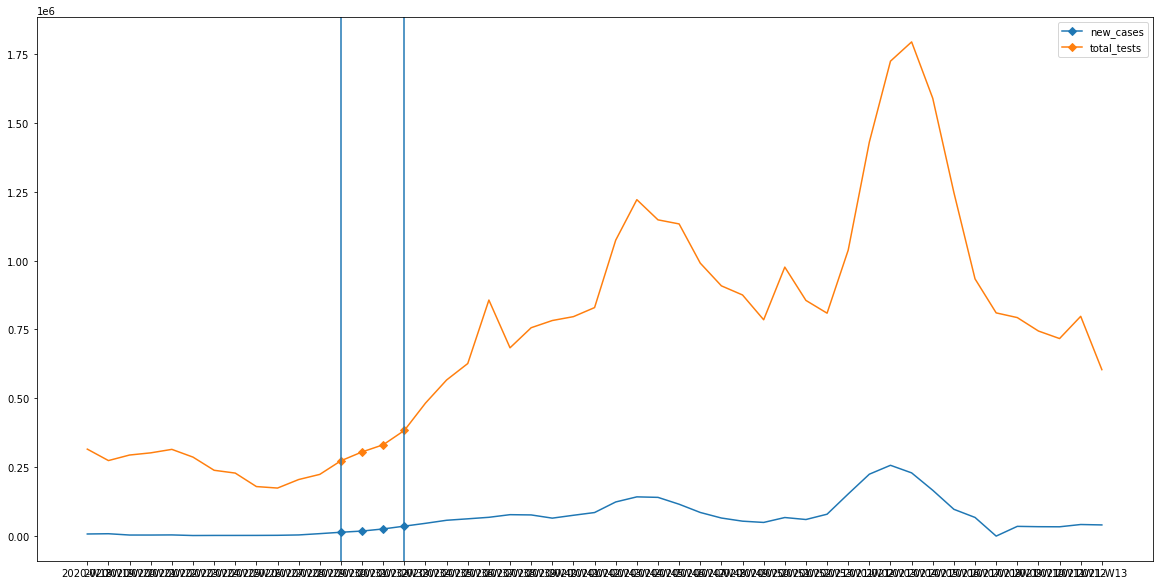

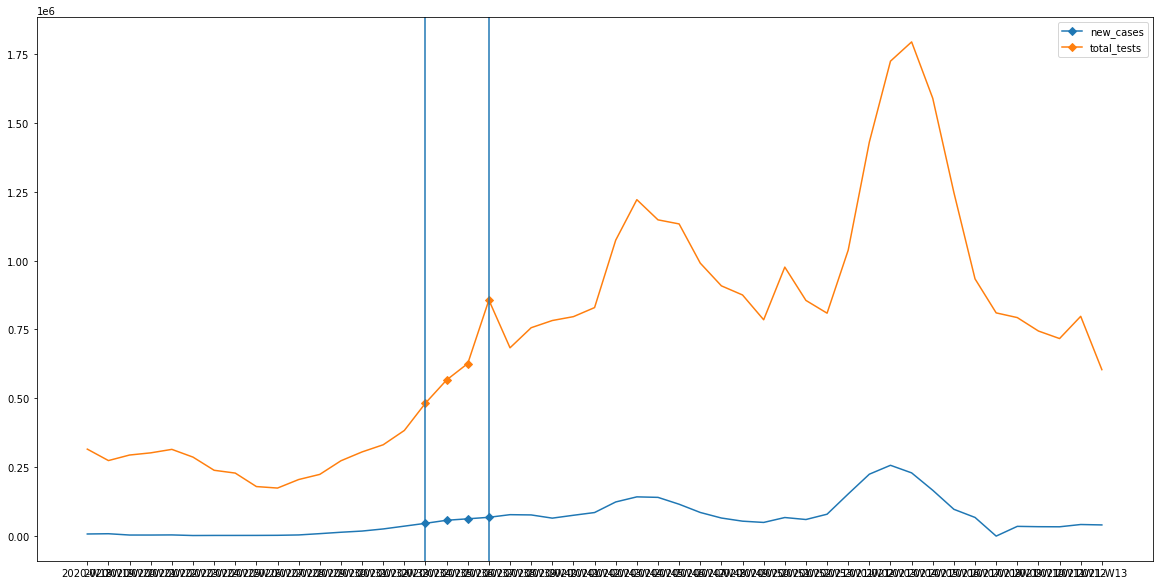

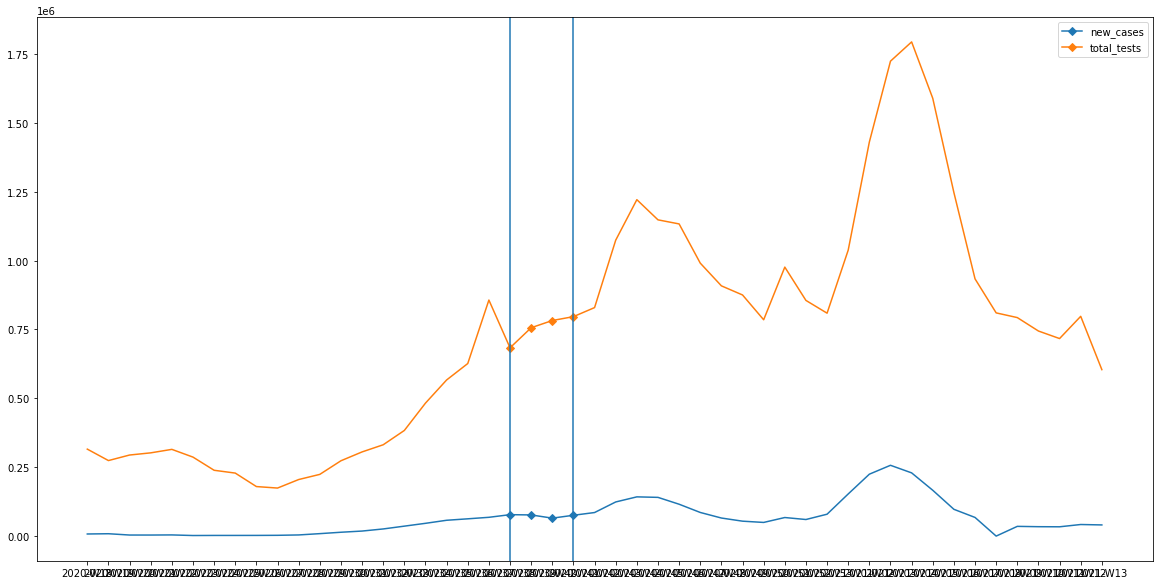

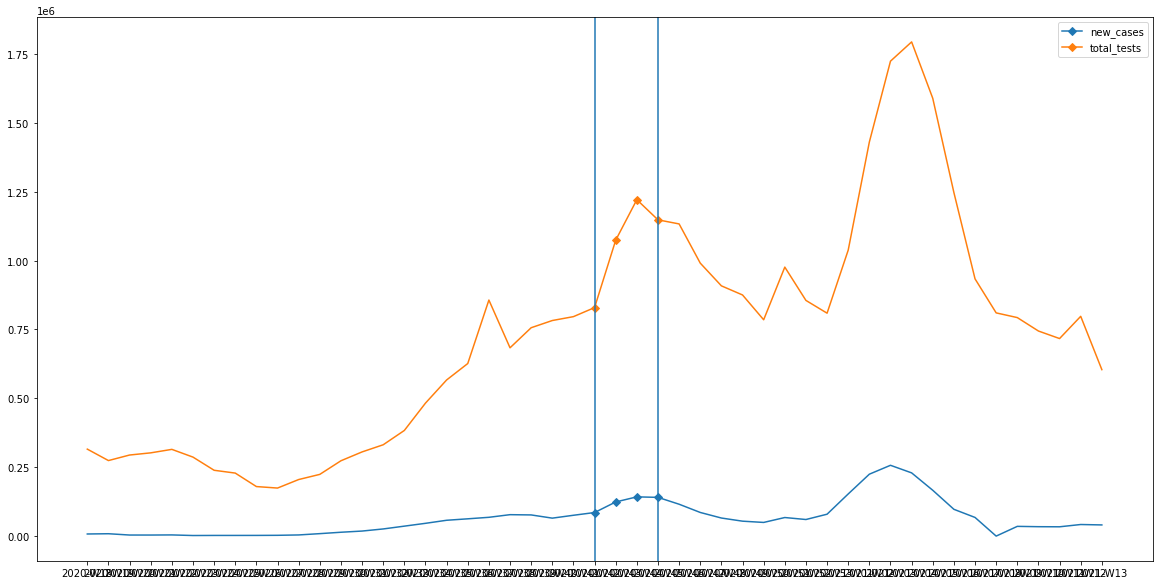

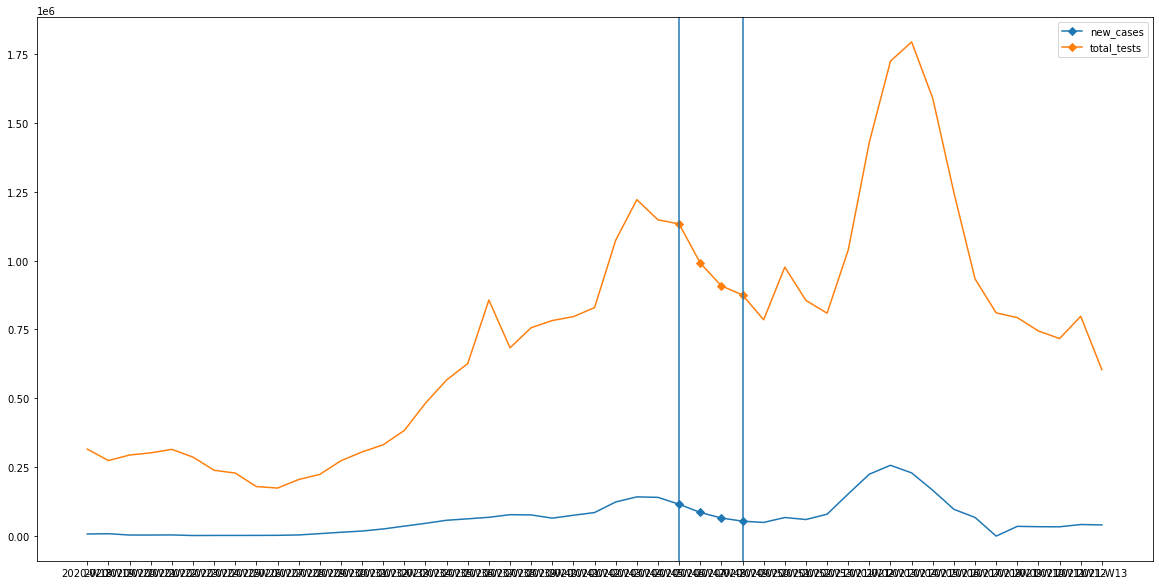

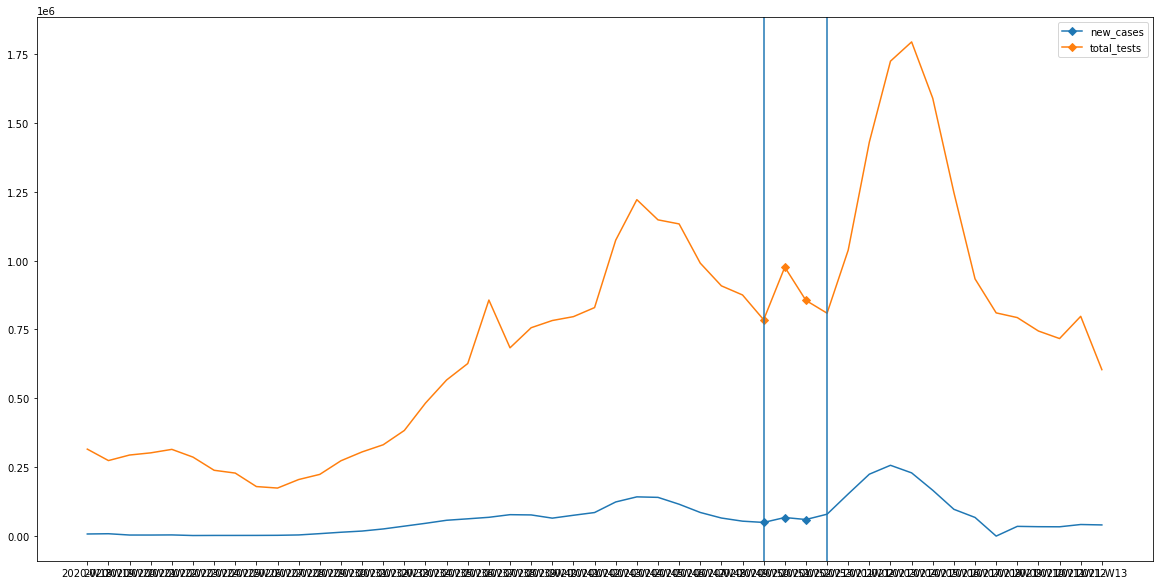

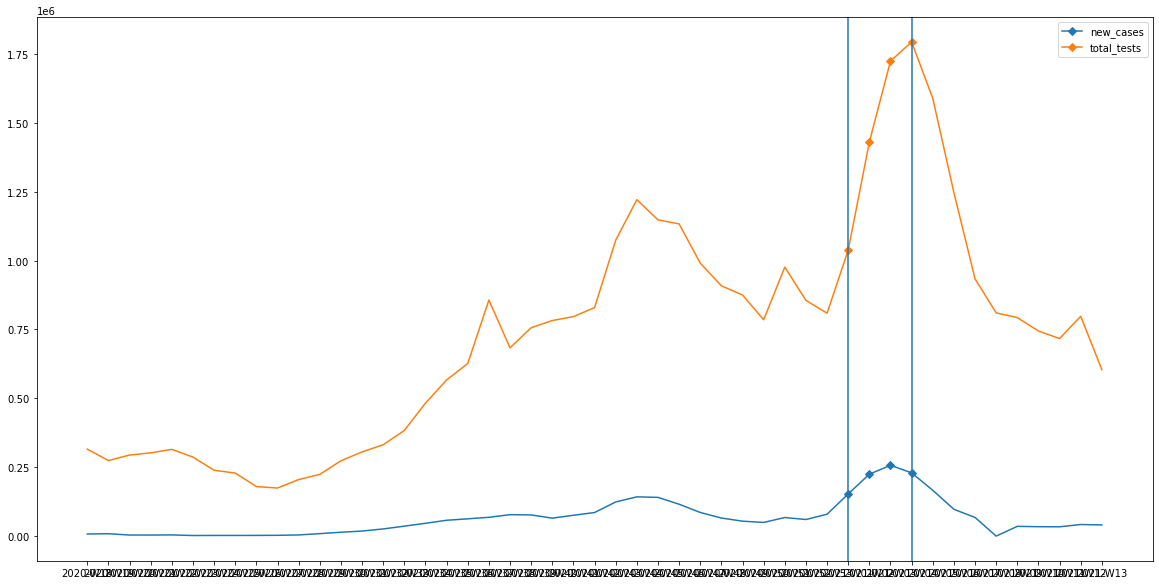

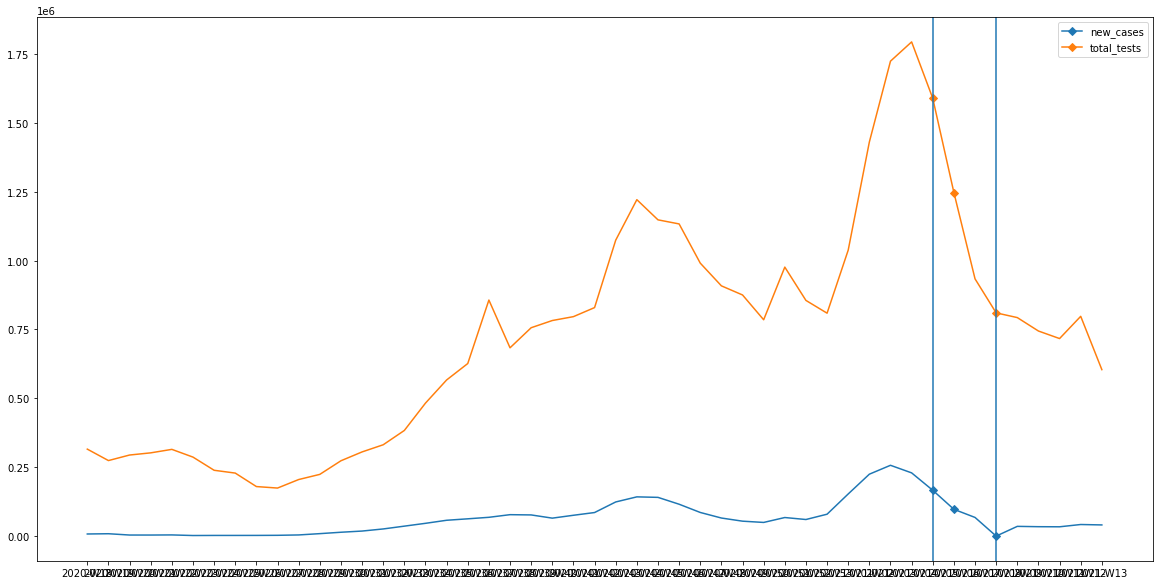

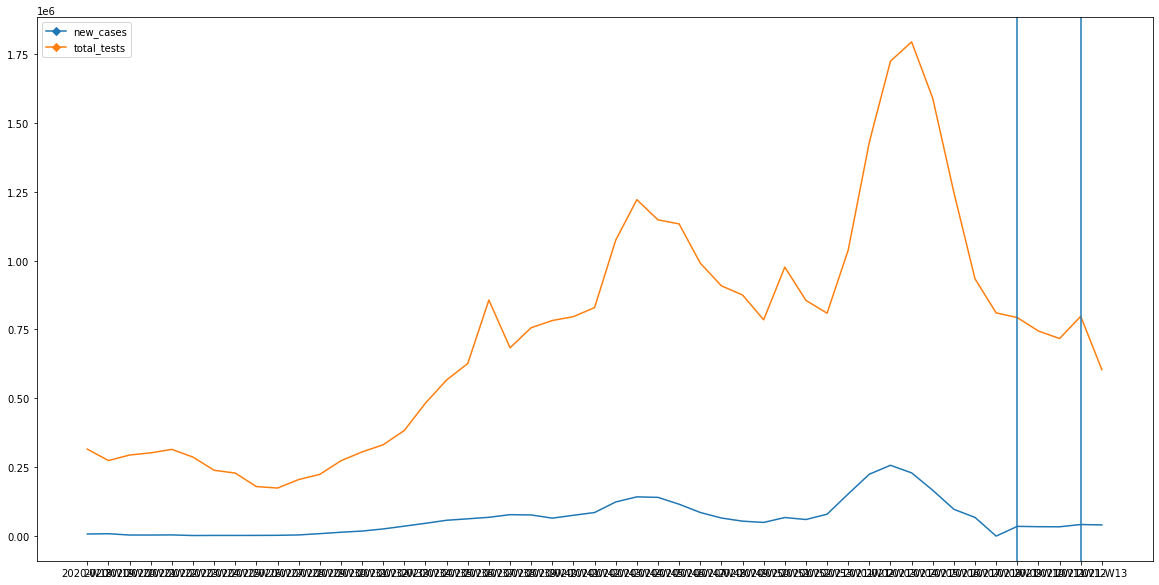

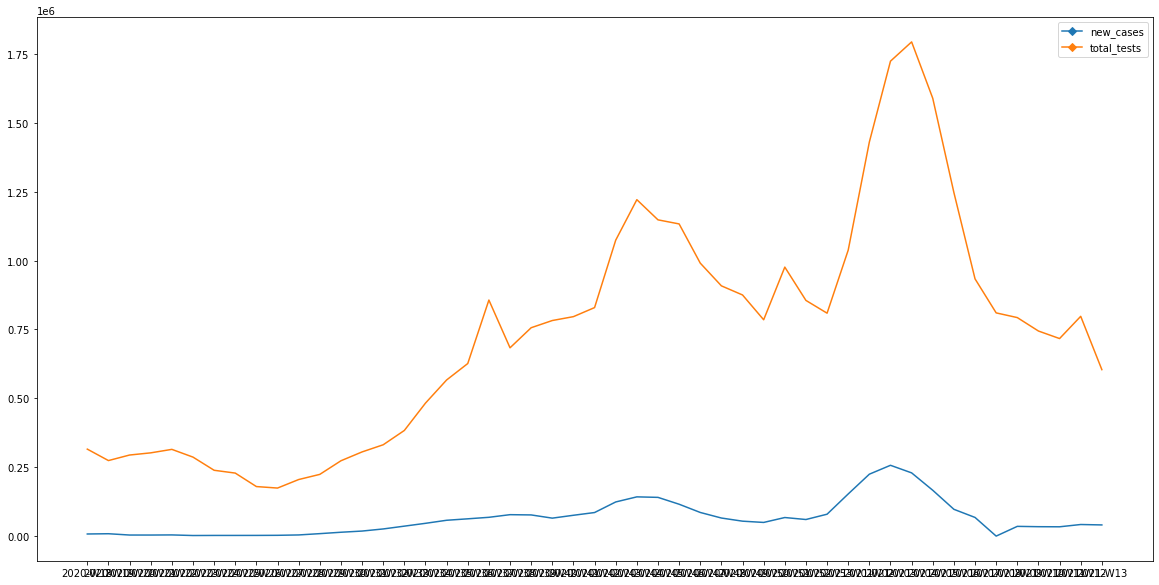

overlapped
total outliers: 34


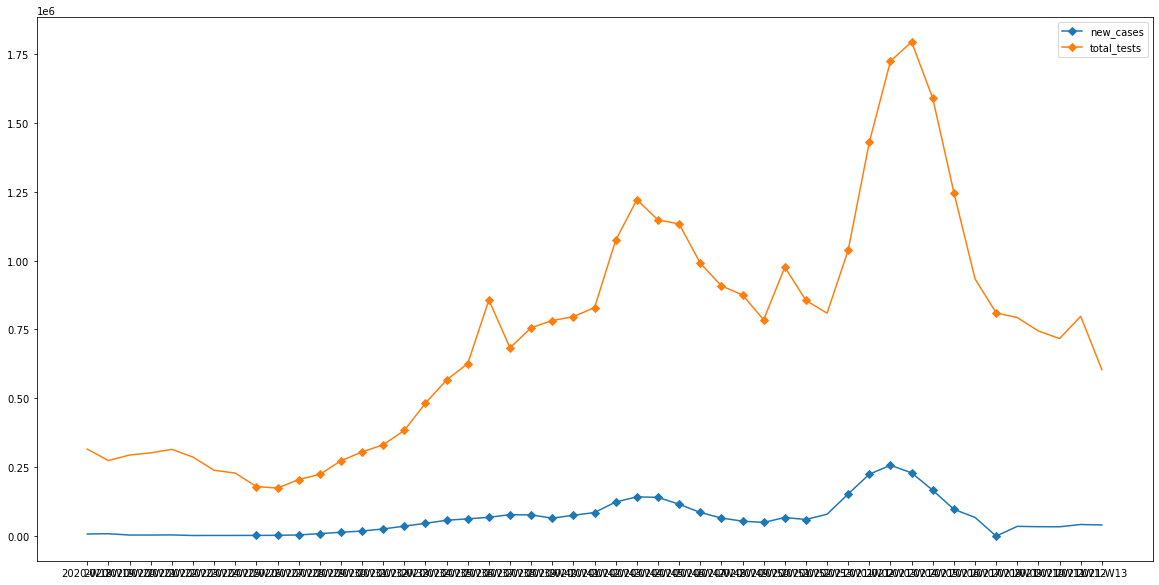

Wall time: 11.7 s


In [29]:
%%time
#fit on past, predict on current month
from sklearn.ensemble import IsolationForest

#split in chuncks of x weeks
chunck_size = 4
chuncks = split_dataframe(working_dataset, chunck_size)
total_indices = []

for index, current in enumerate(chuncks[1:], start=1):
    until_current = join_dataframe(chuncks[:index])
    
    clf = alg.fit(until_current)
    pred = clf.predict(current).tolist()
    indices = [num + index * chunck_size for num, element in enumerate(pred) if element == -1]
    total_indices.extend(indices)
    vertical_marks = []
    pyplot.plot(working_dataset, '-D', markevery=indices)
    try:
        start_incides = index * chunck_size
        end_incides = ( index + 1 ) * chunck_size - 1 
        vertical_marks = [working_dataset.iloc[start_incides].name, working_dataset.iloc[end_incides].name]
        pyplot.axvline(x=vertical_marks[0])
        pyplot.axvline(x=vertical_marks[1])
    except:
        pass
    pyplot.legend(['new_cases', 'total_tests'])
    pyplot.show()
    
print("overlapped")
print(f"total outliers: {len(total_indices)}")
pyplot.plot(working_dataset, '-D', markevery=total_indices)
pyplot.legend(['new_cases', 'total_tests'])
pyplot.show()

C:\Users\ioana\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:473: RuntimeWarning: invalid value encountered in true_divide
  -depths
C:\Users\ioana\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:336: RuntimeWarning: invalid value encountered in less
  is_inlier[self.decision_function(X) < 0] = -1


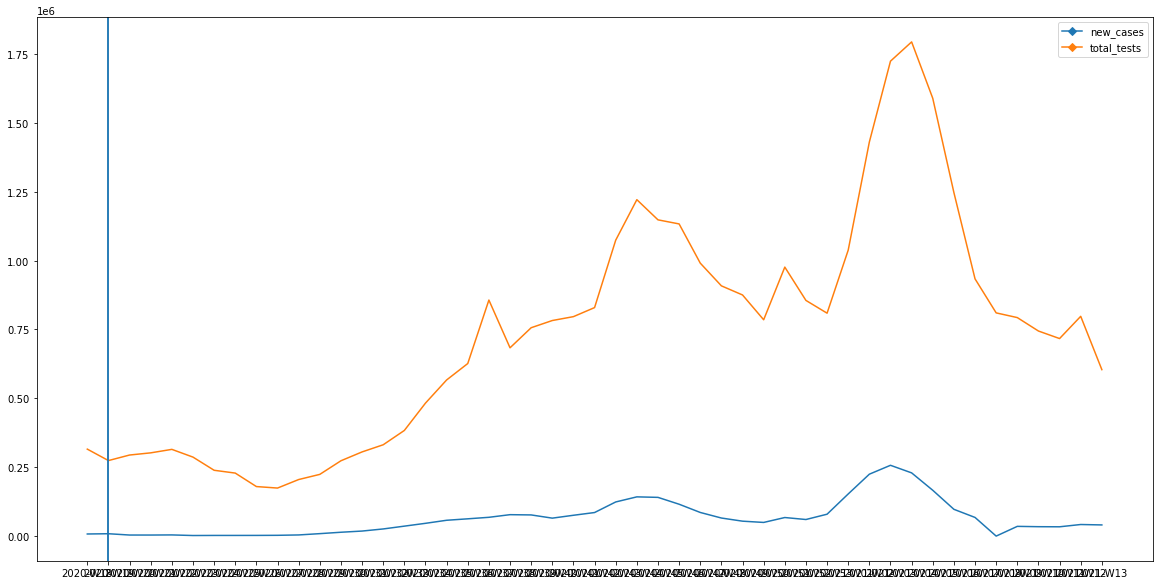

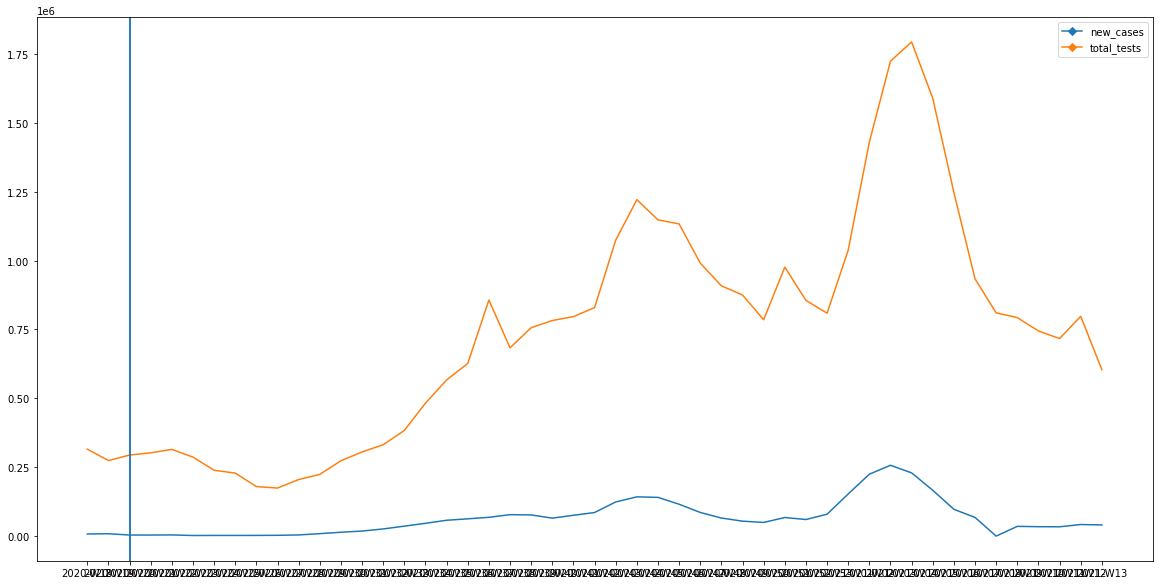

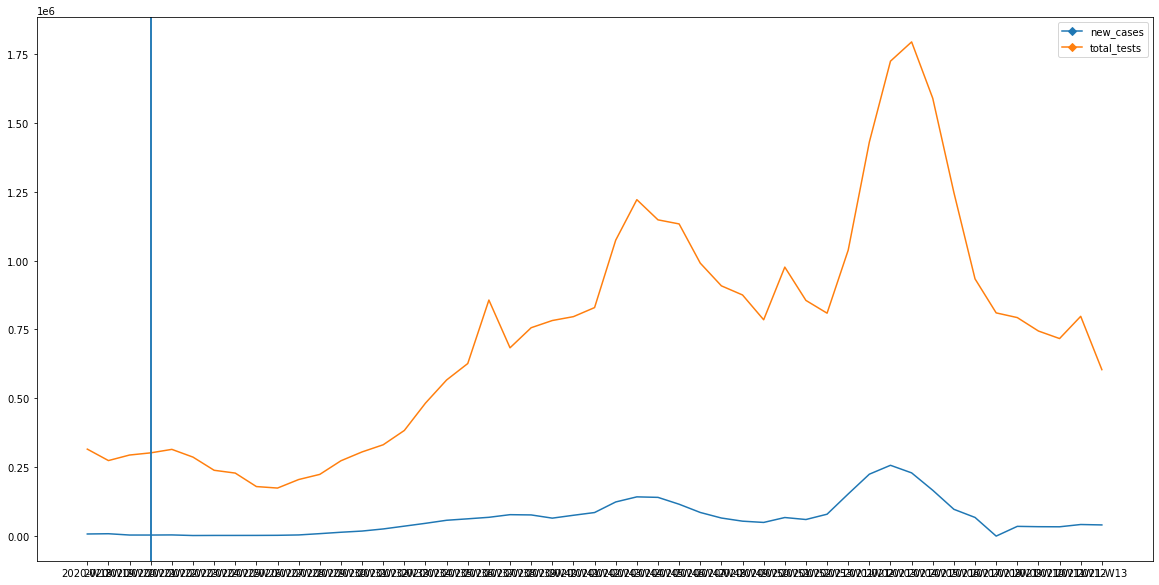

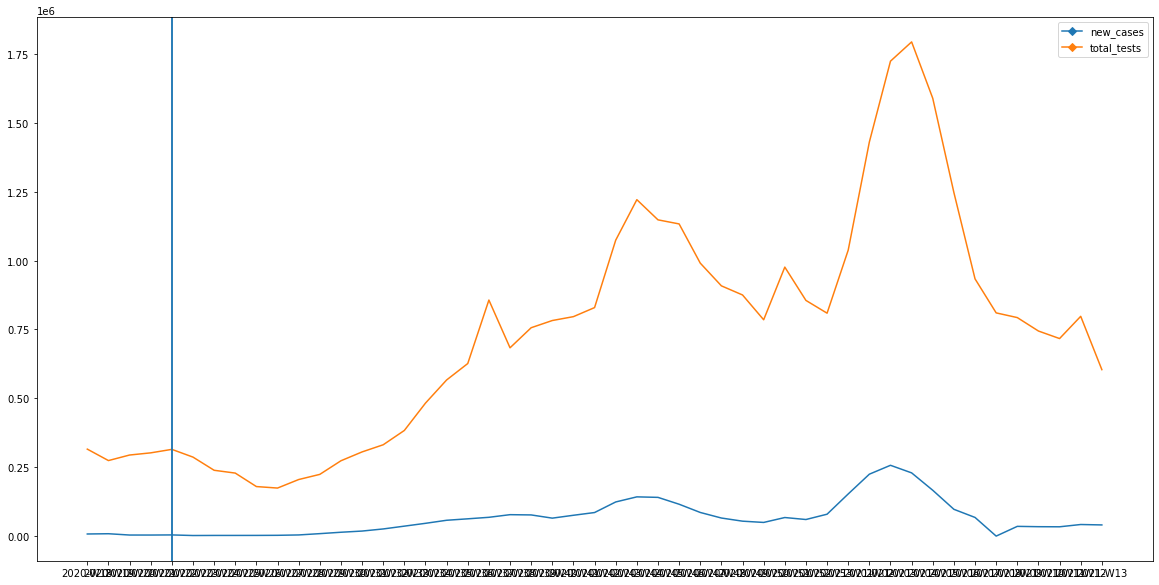

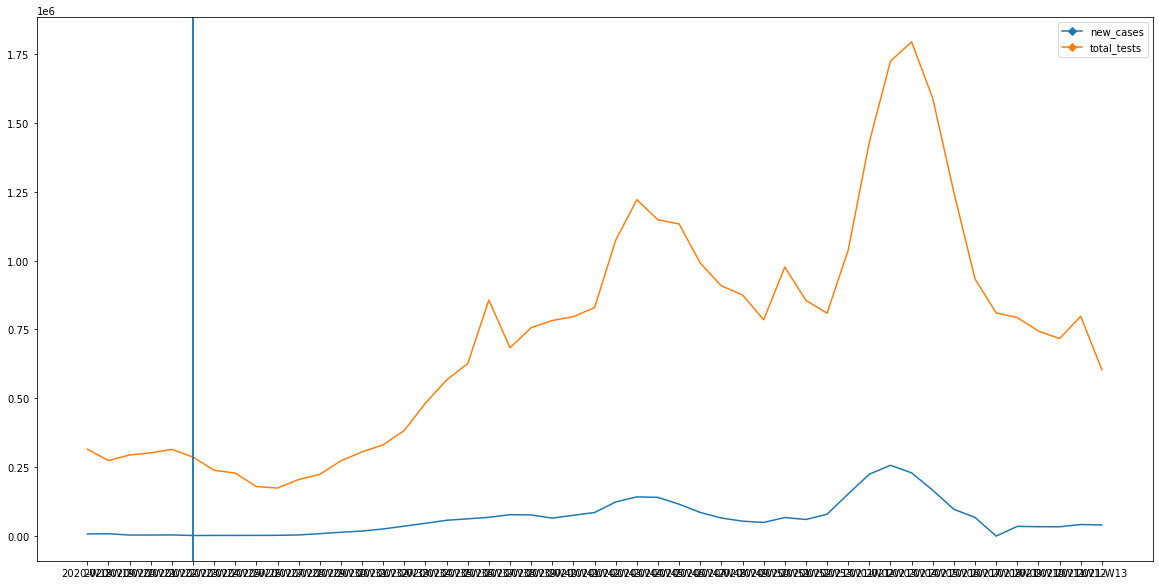

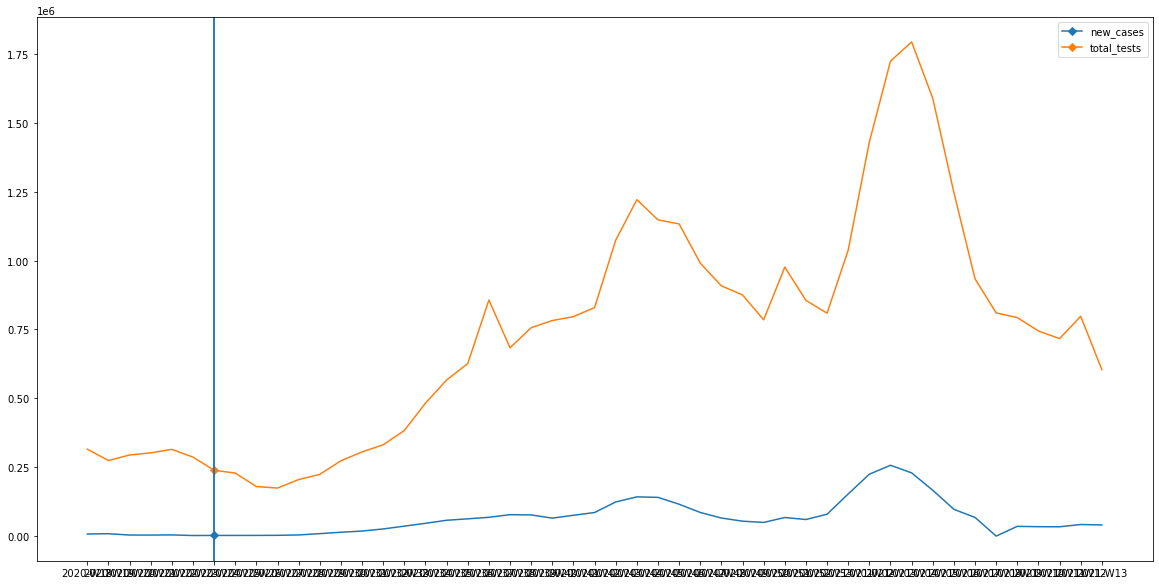

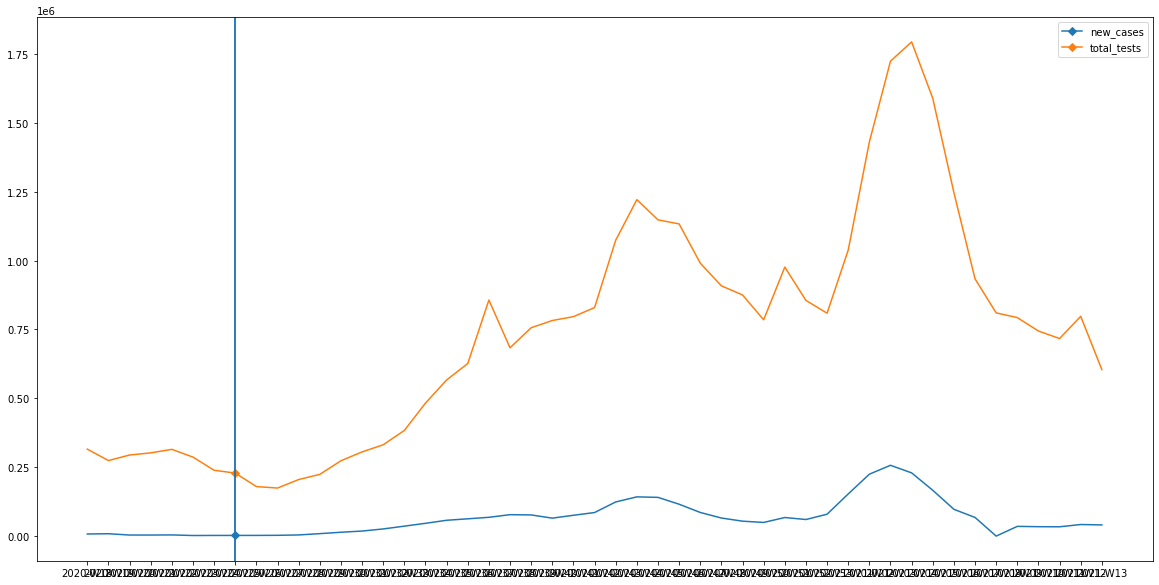

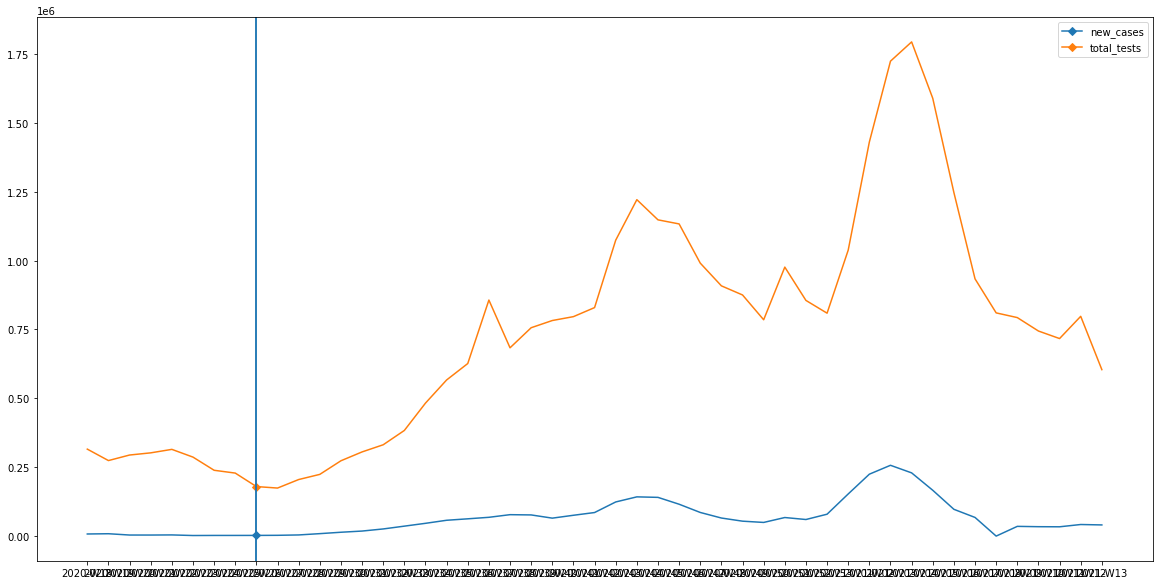

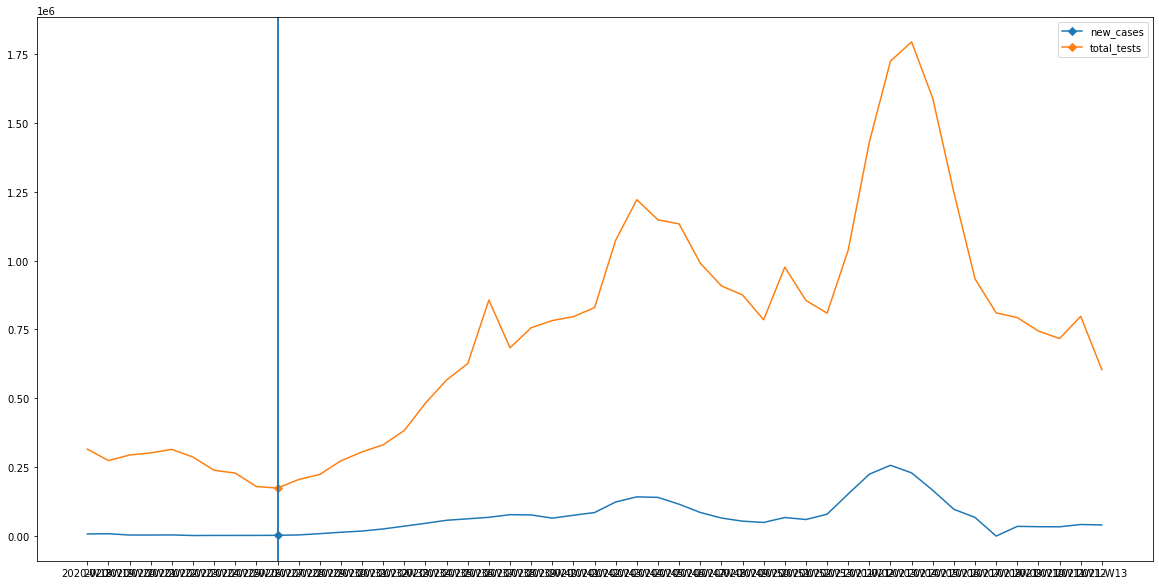

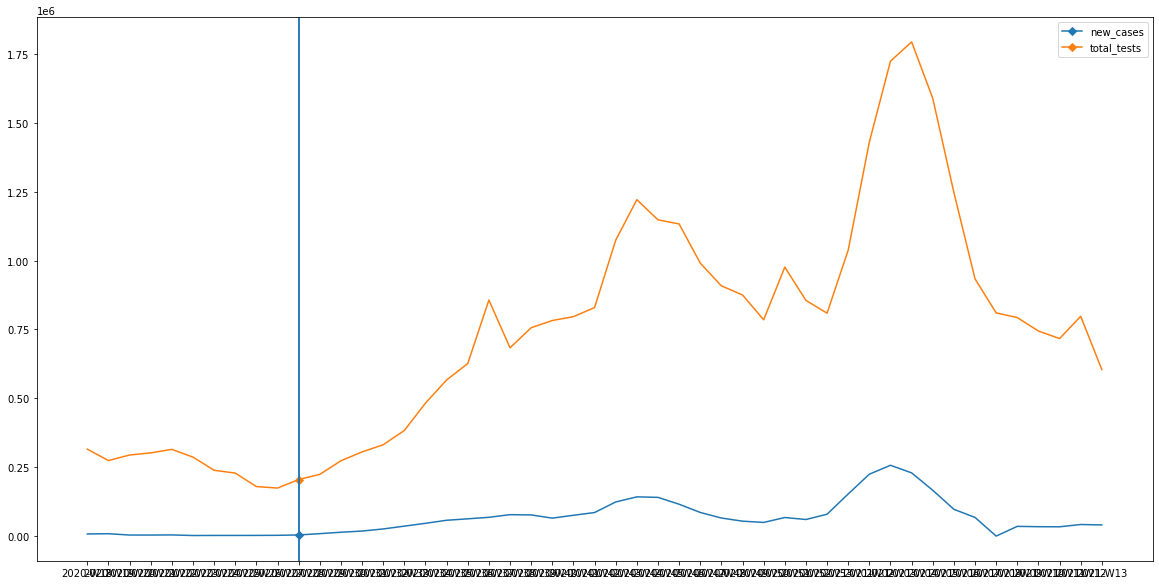

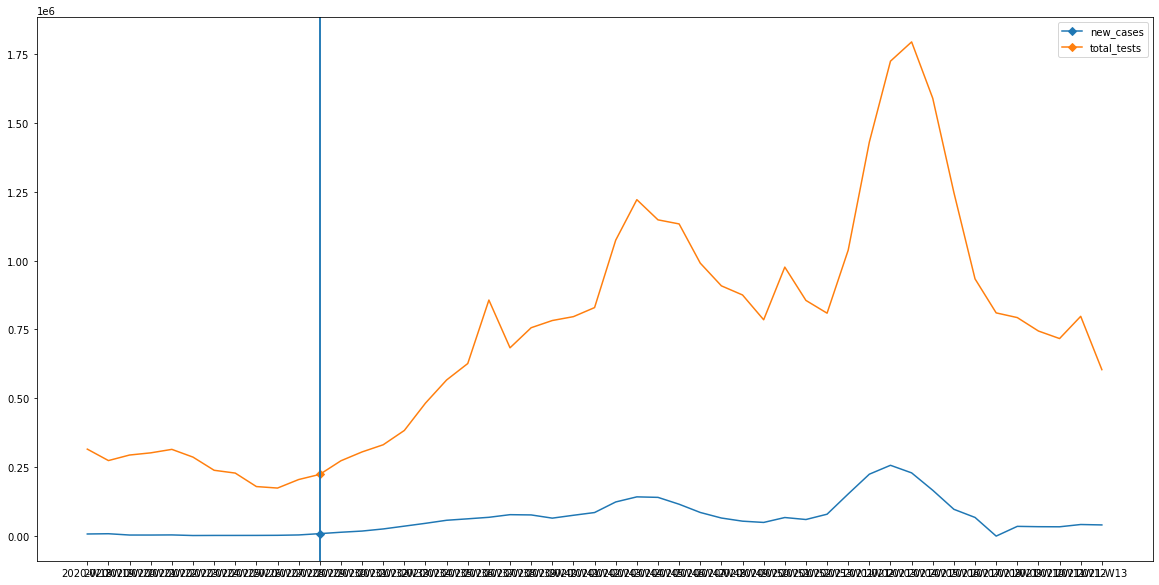

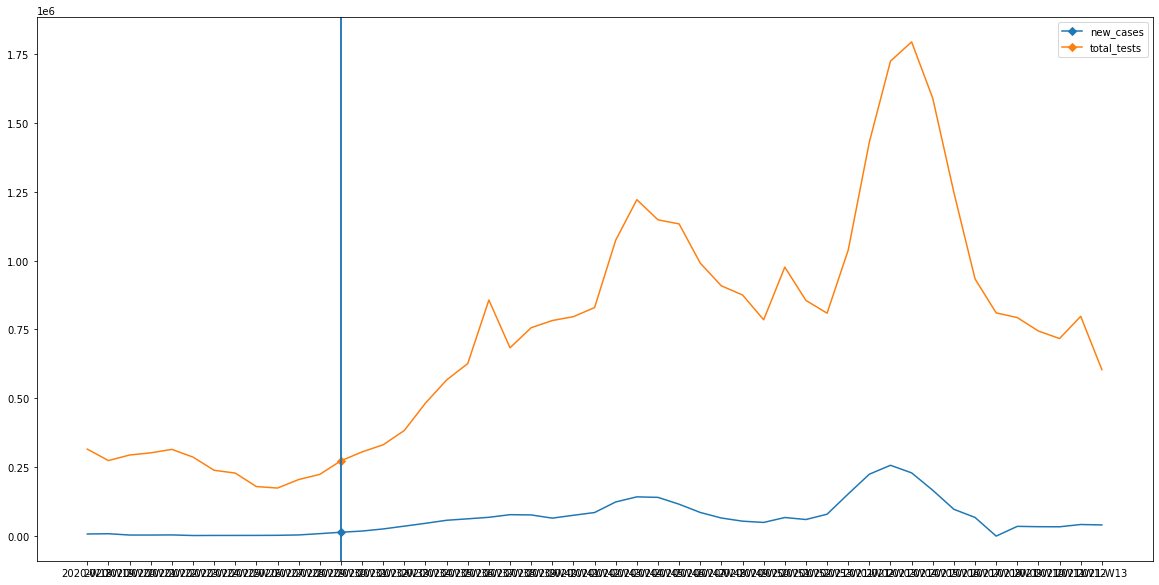

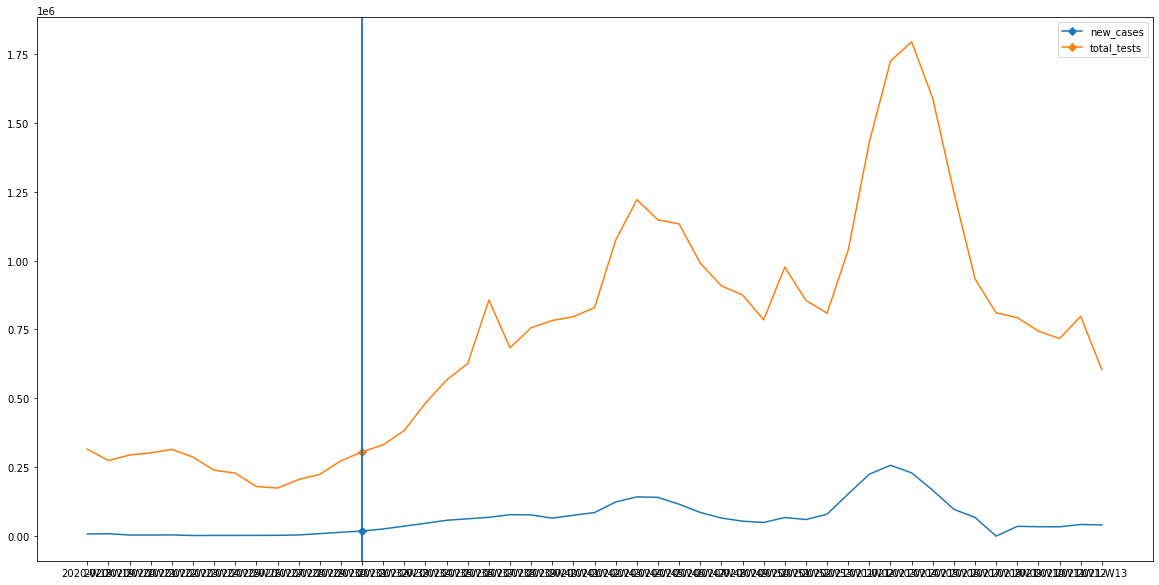

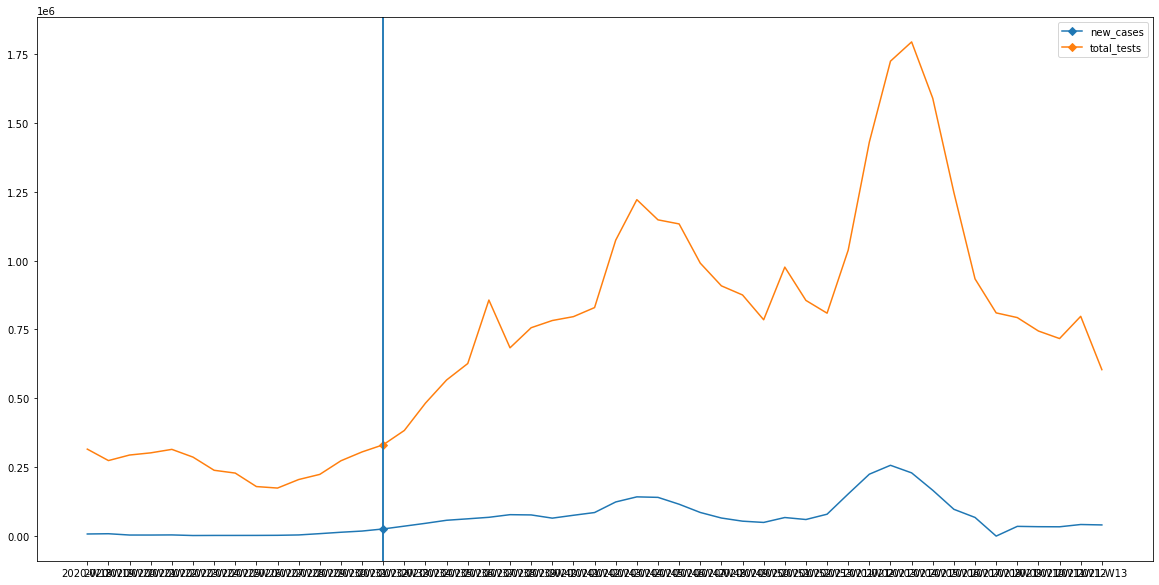

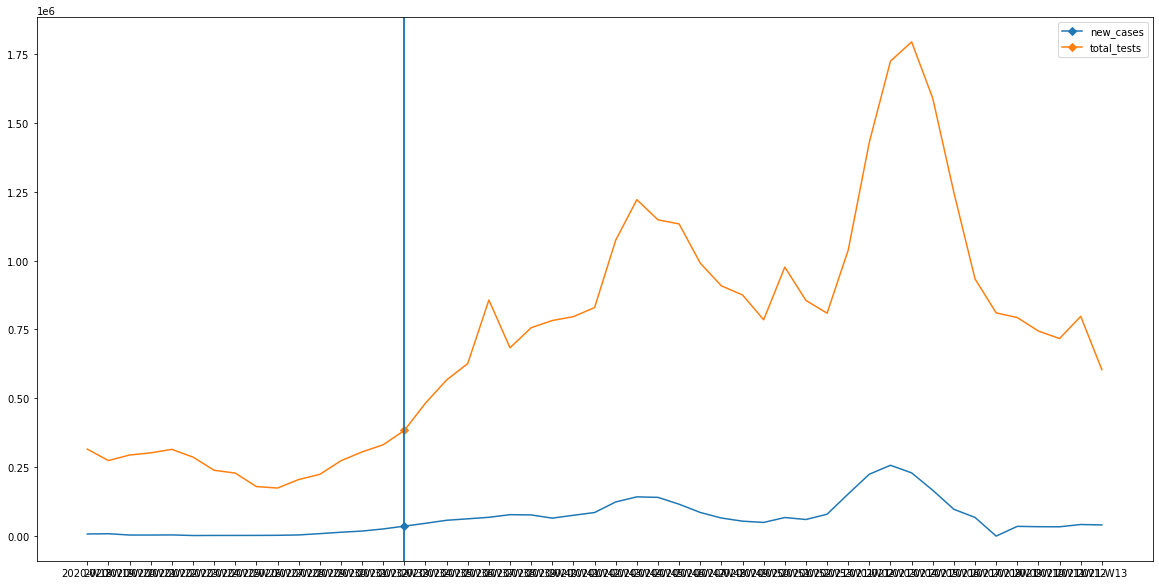

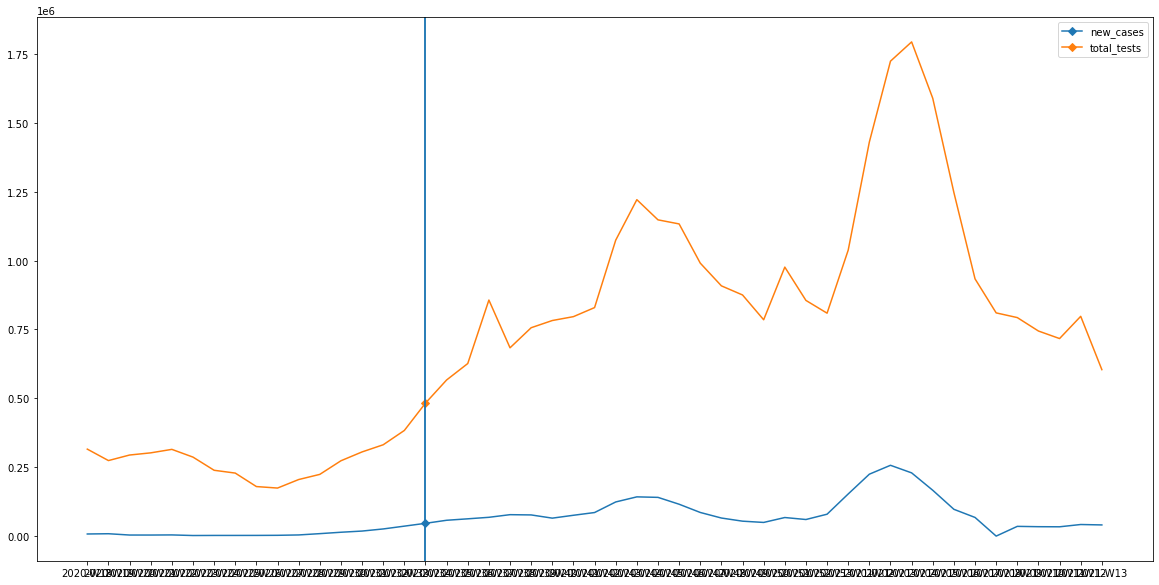

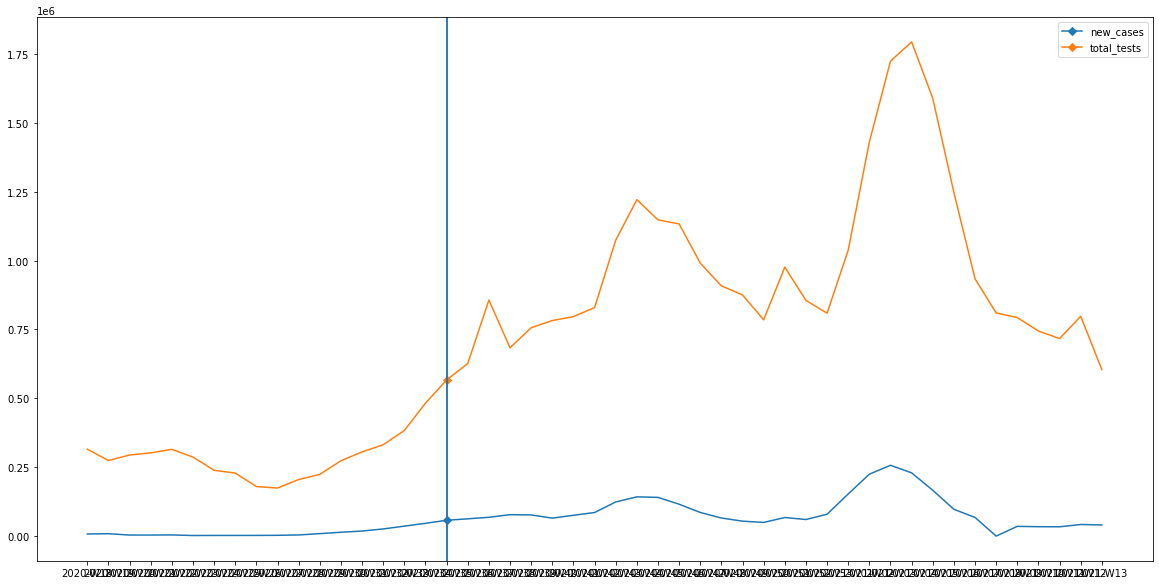

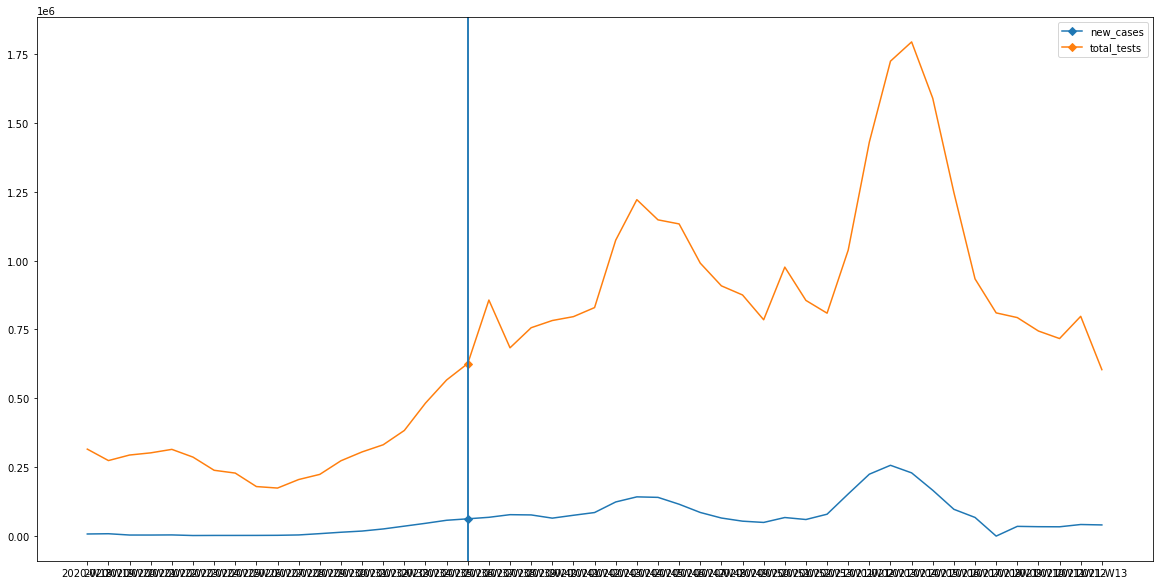

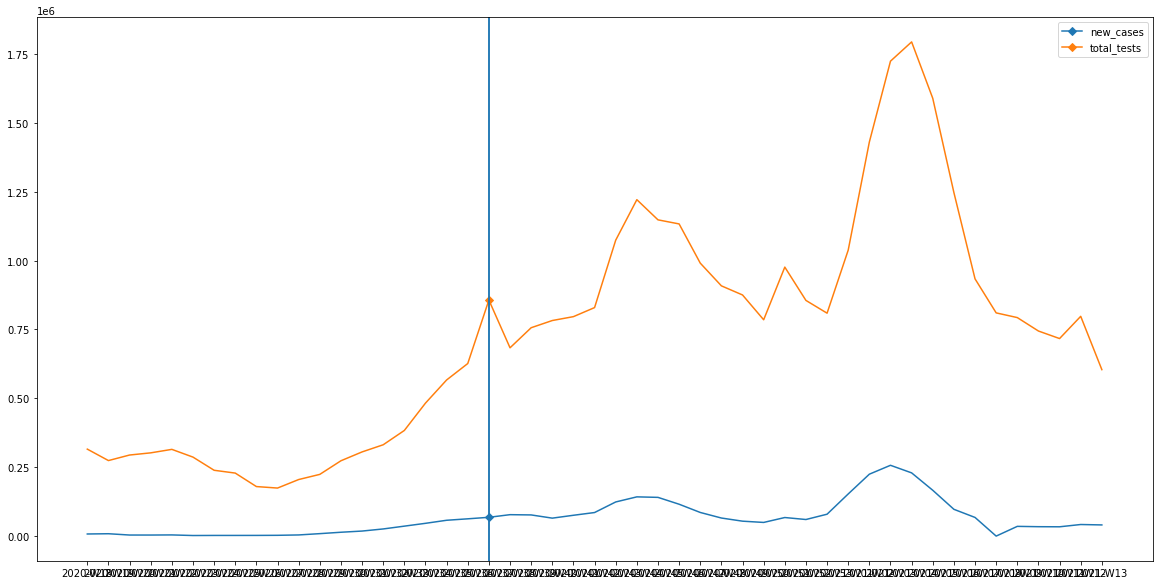

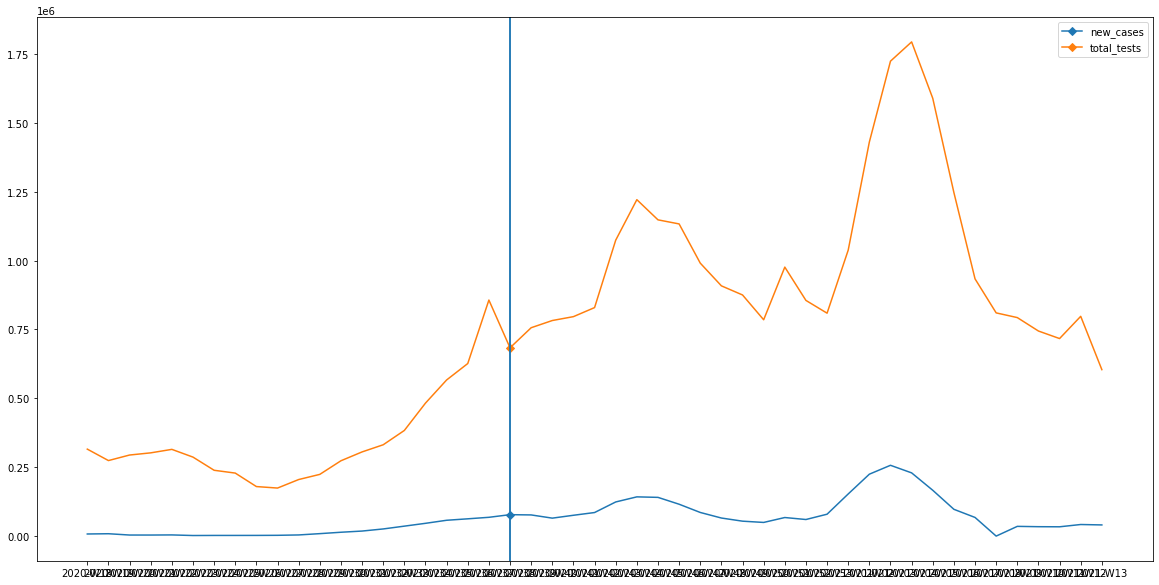

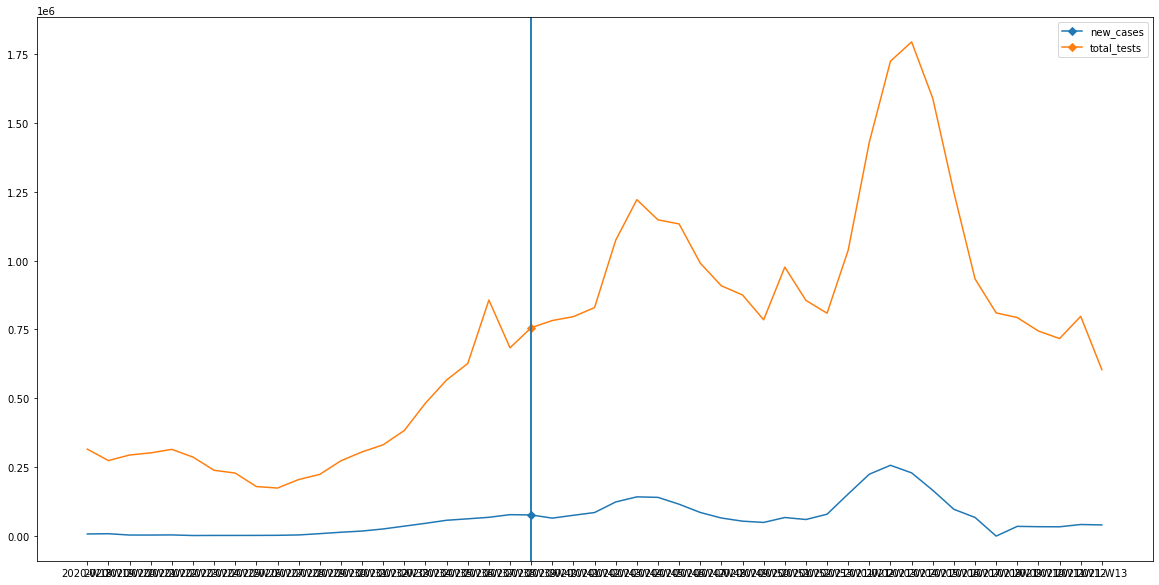

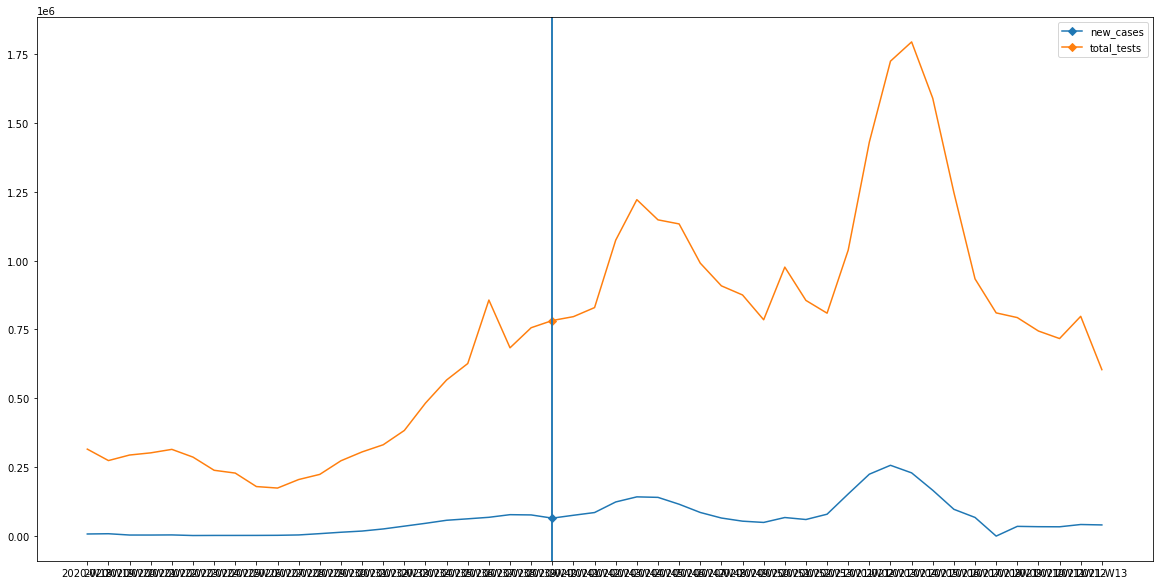

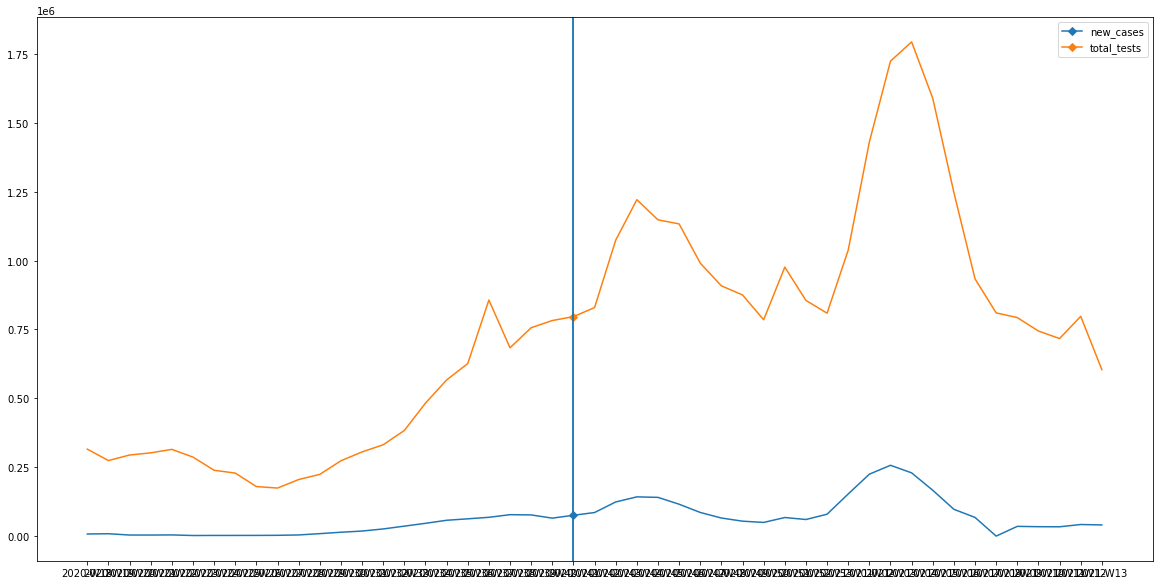

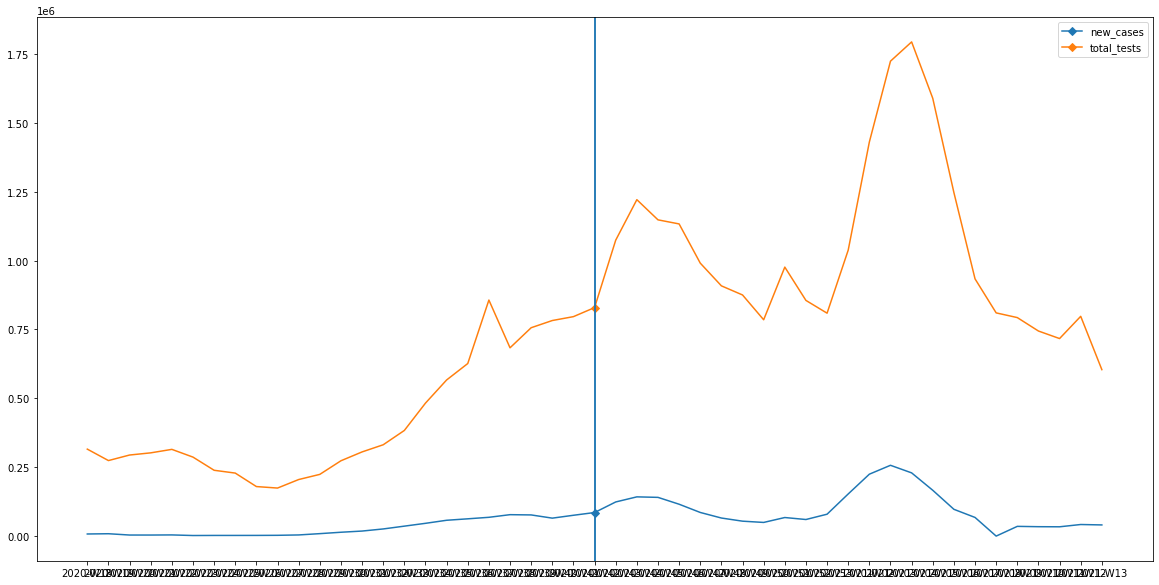

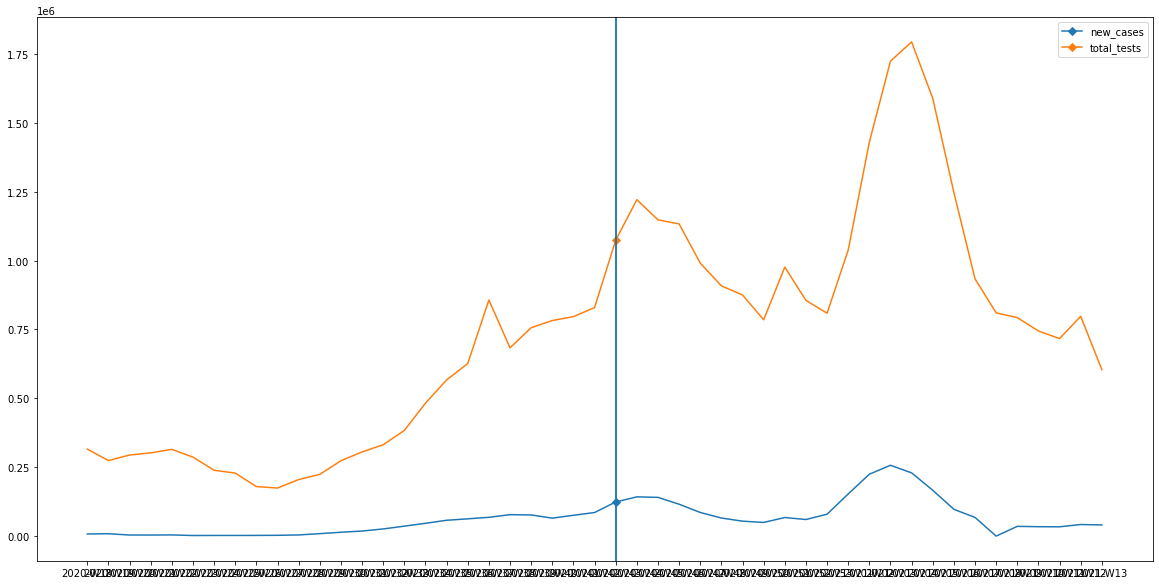

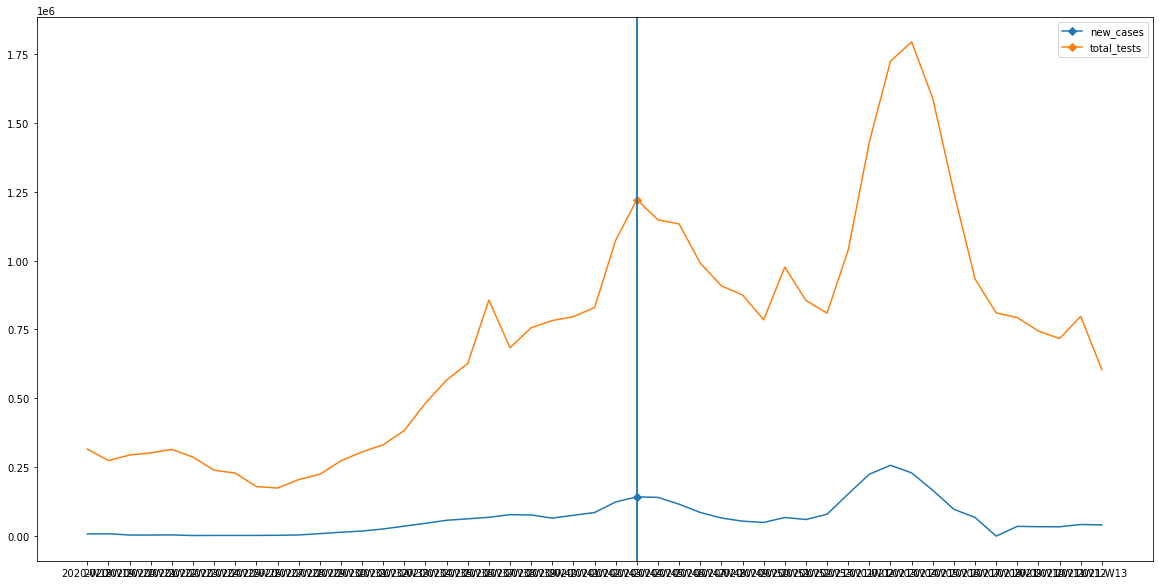

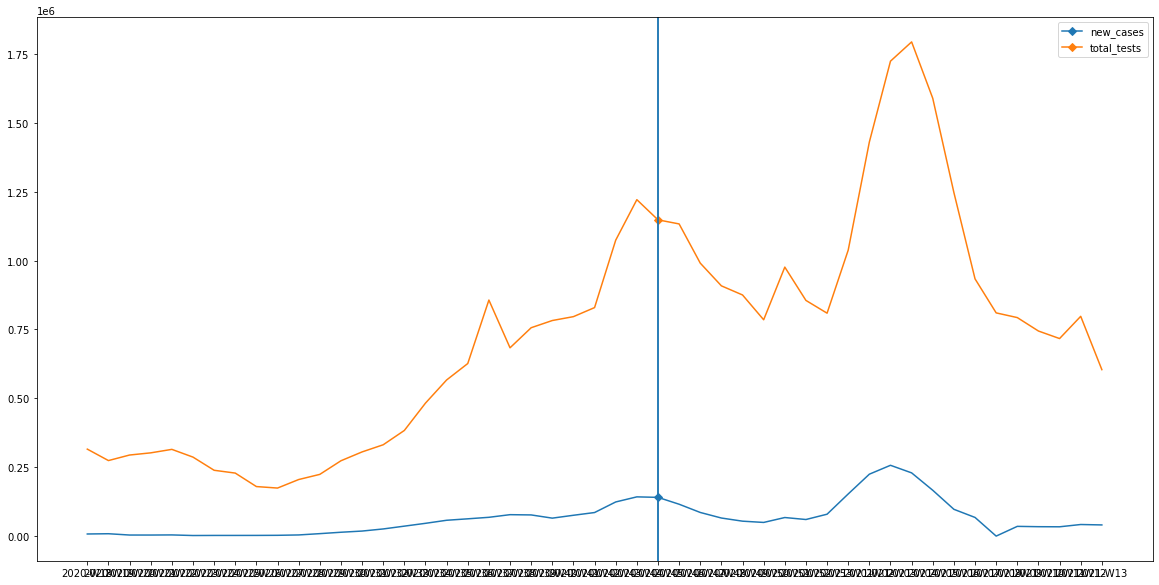

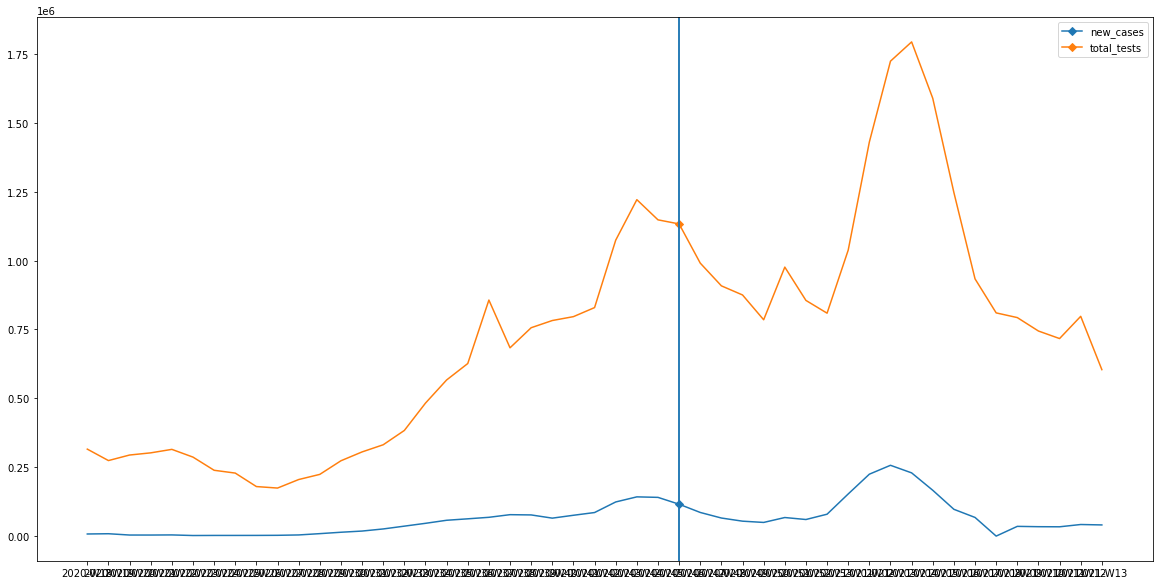

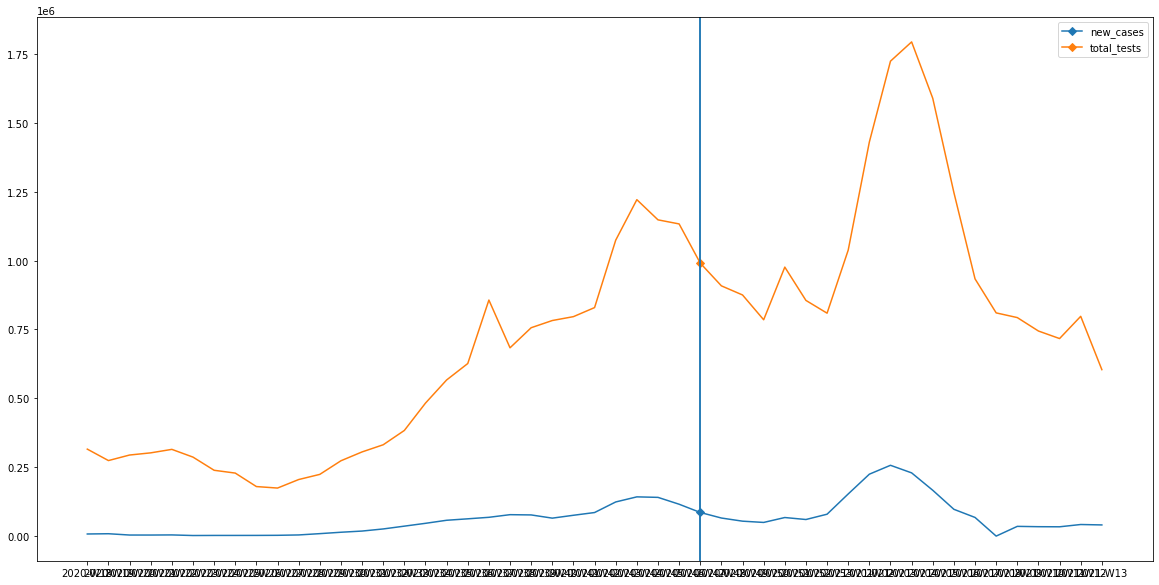

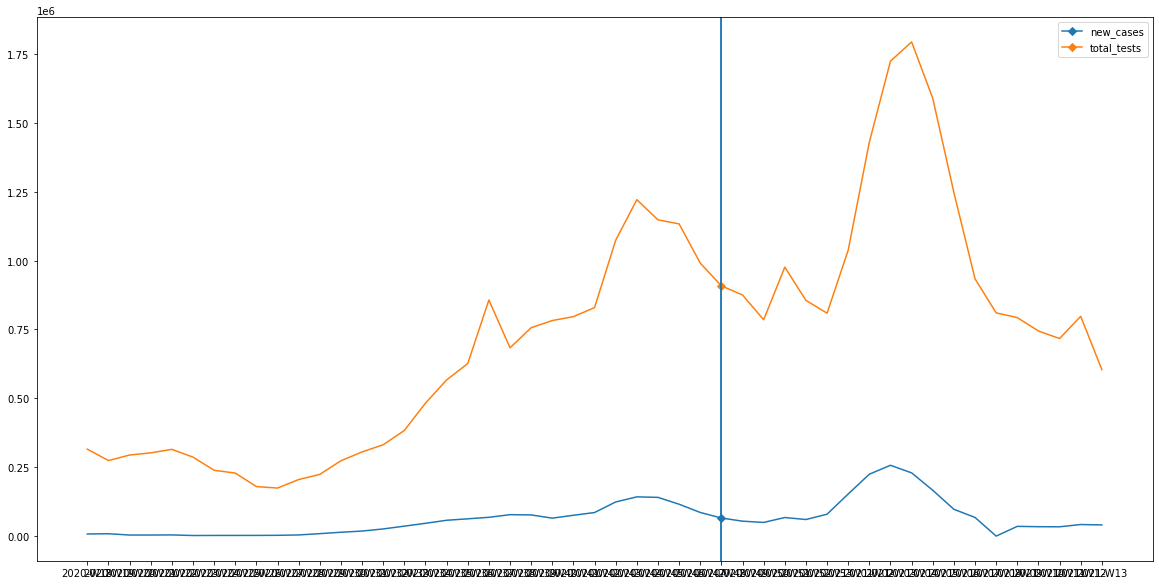

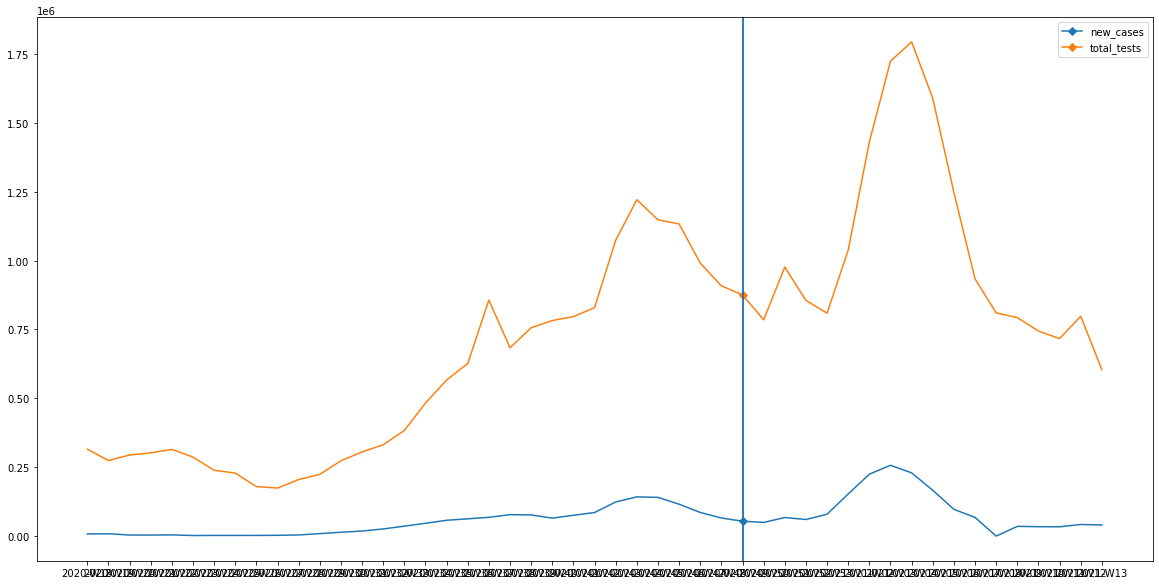

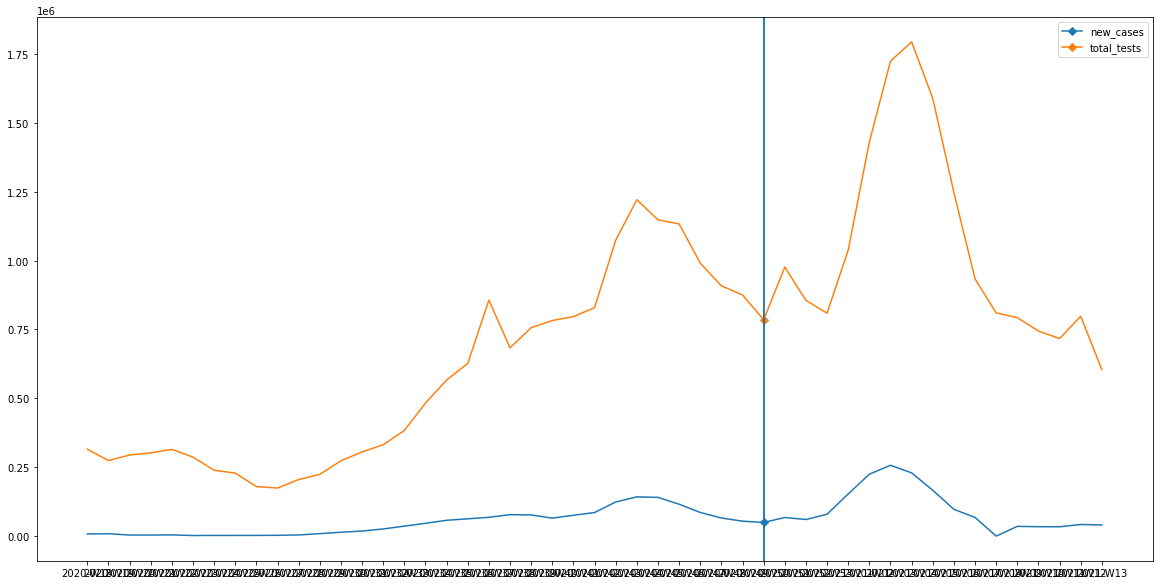

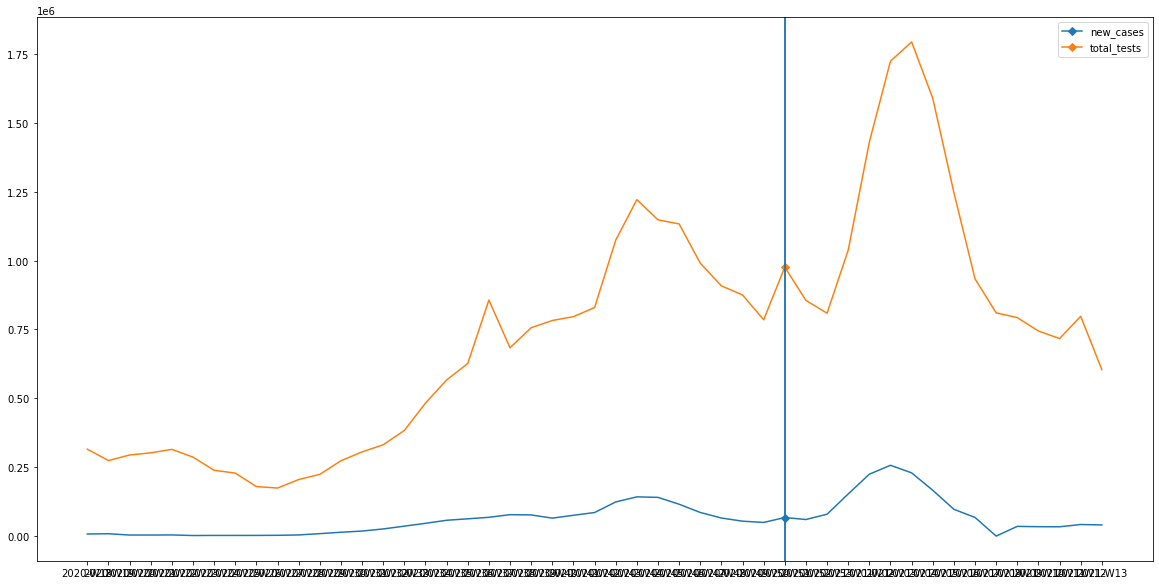

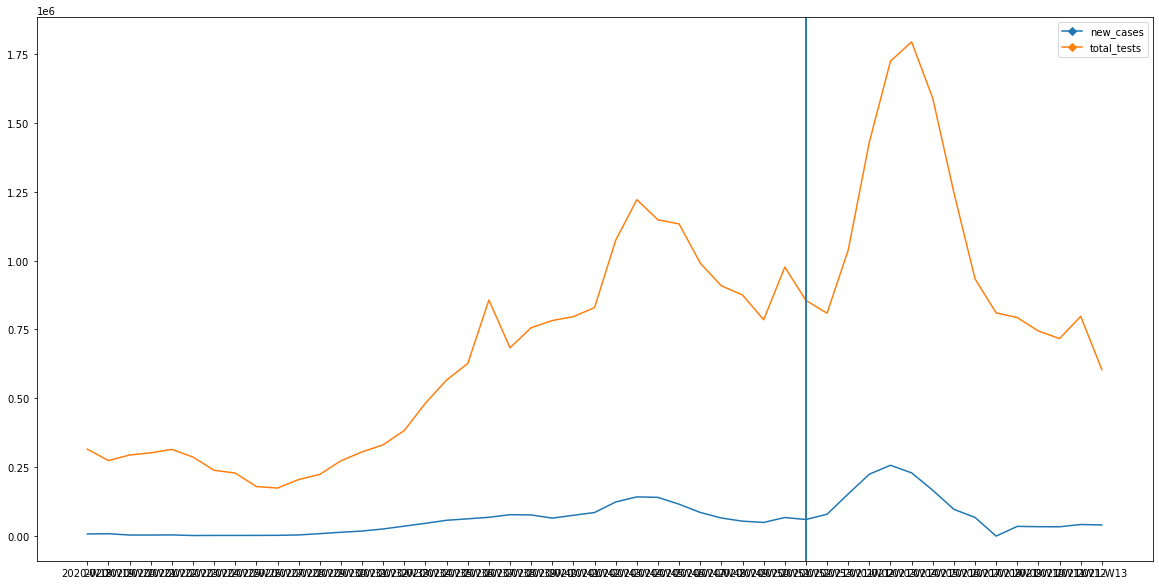

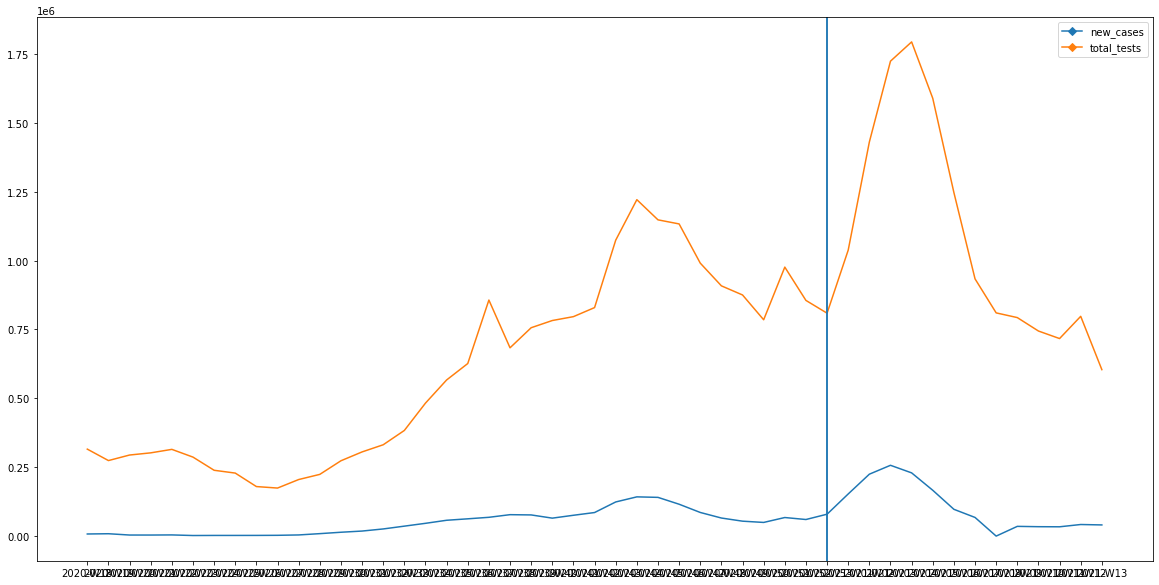

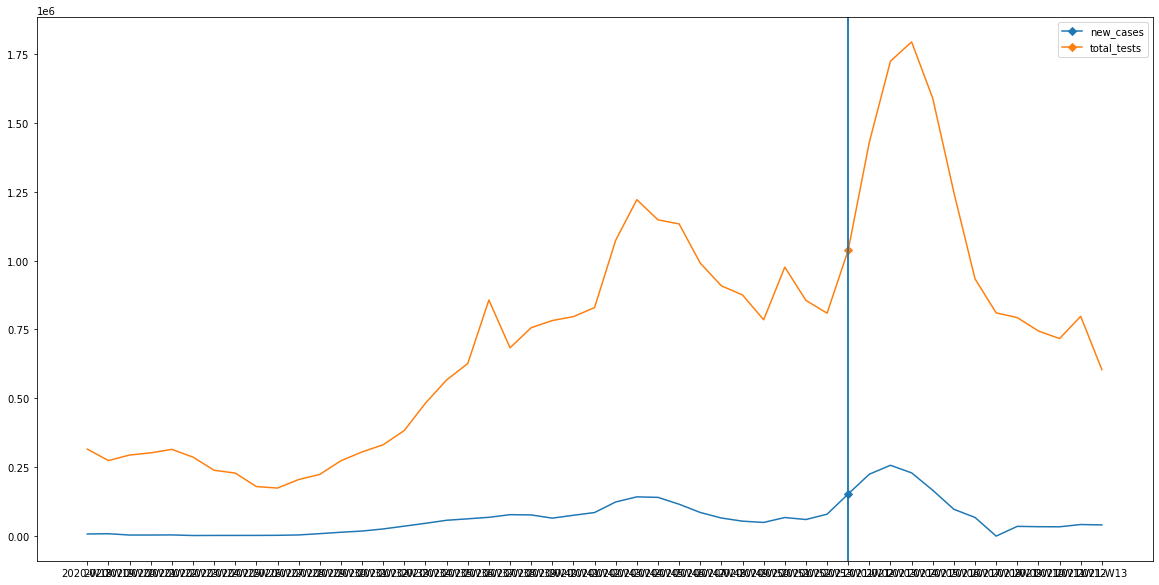

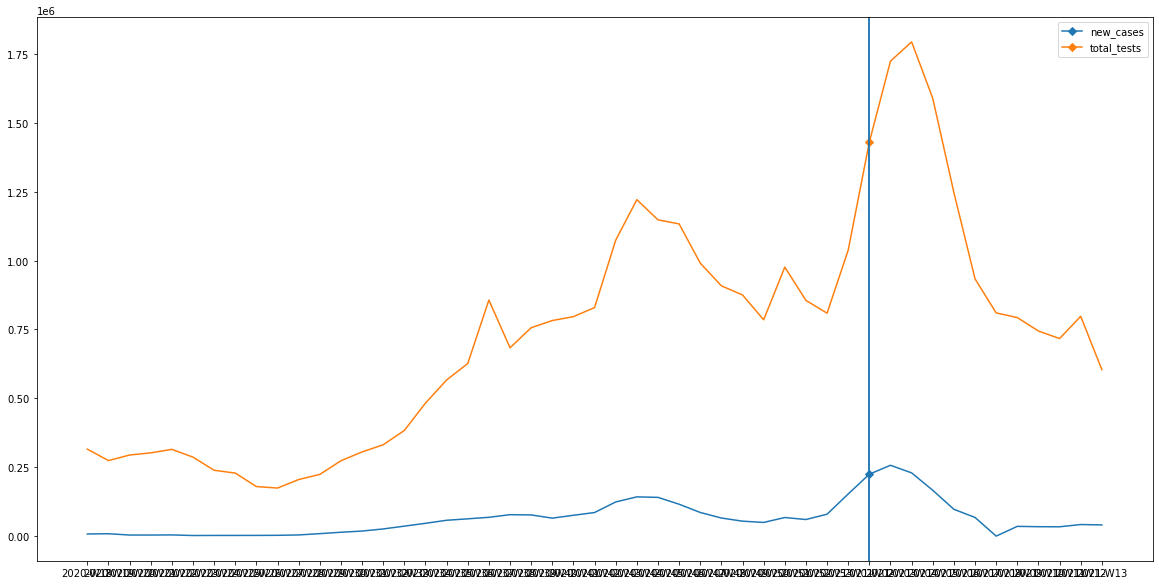

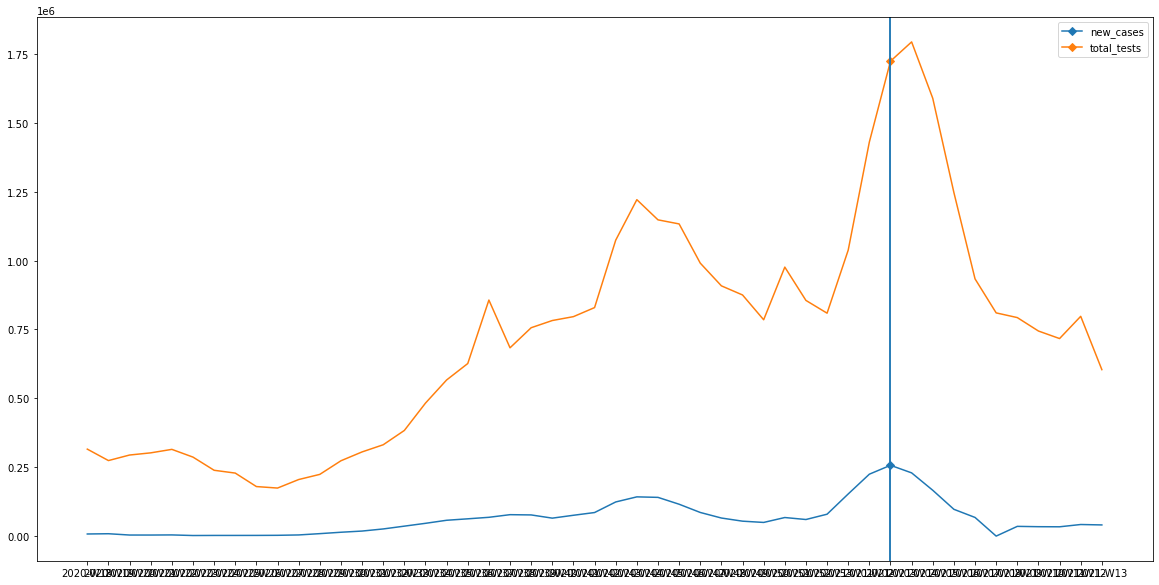

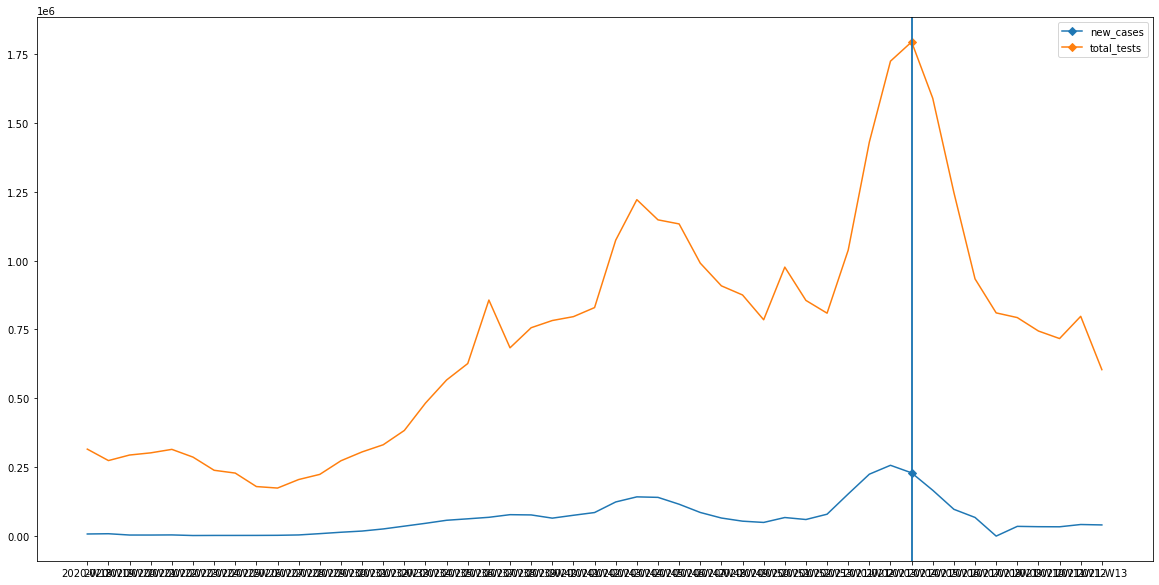

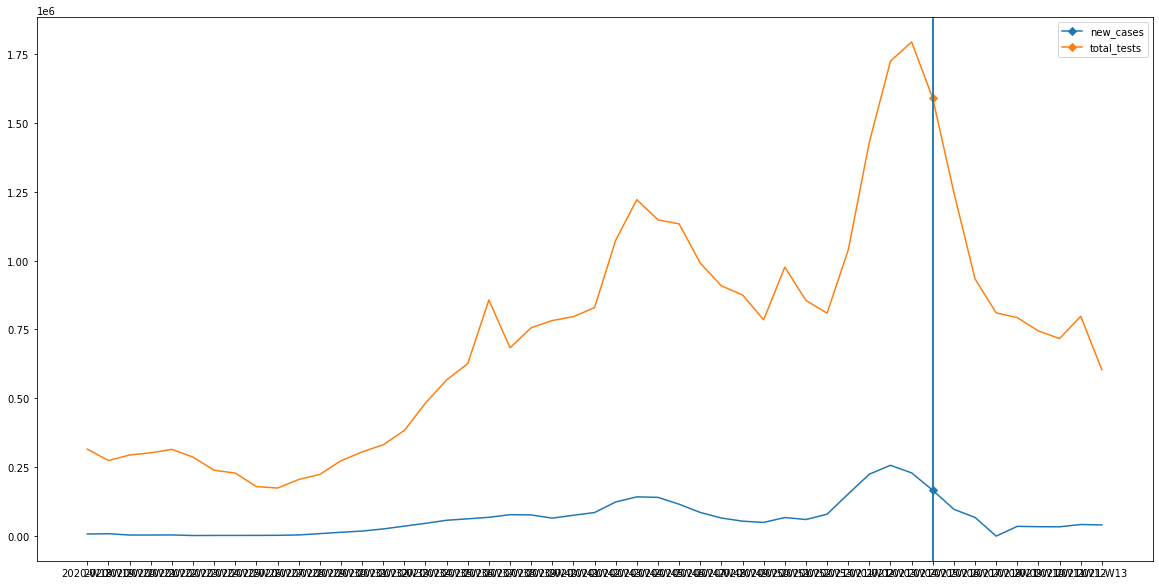

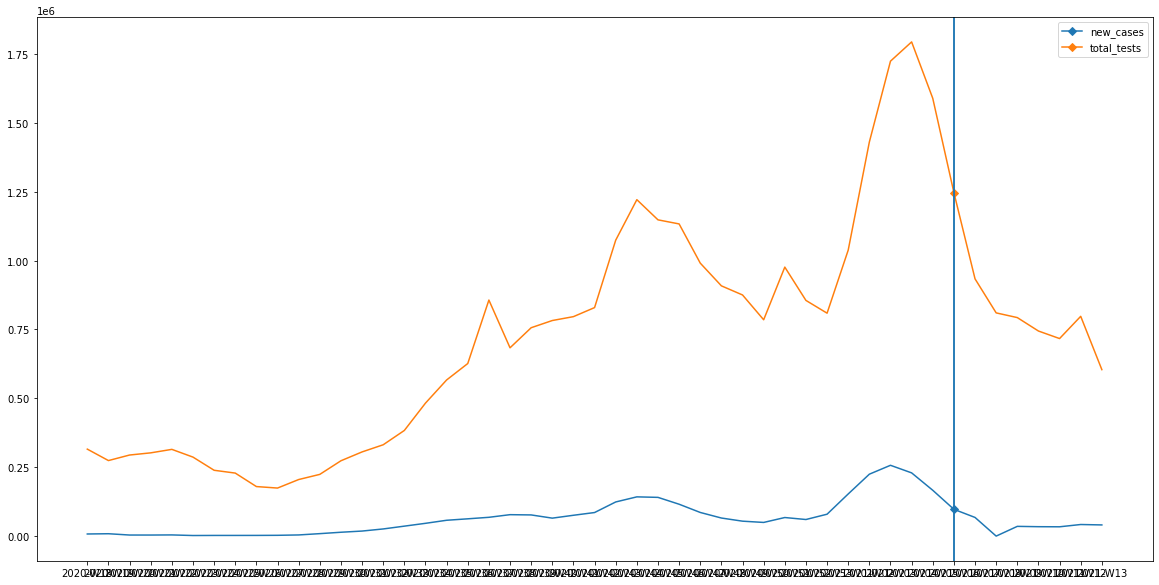

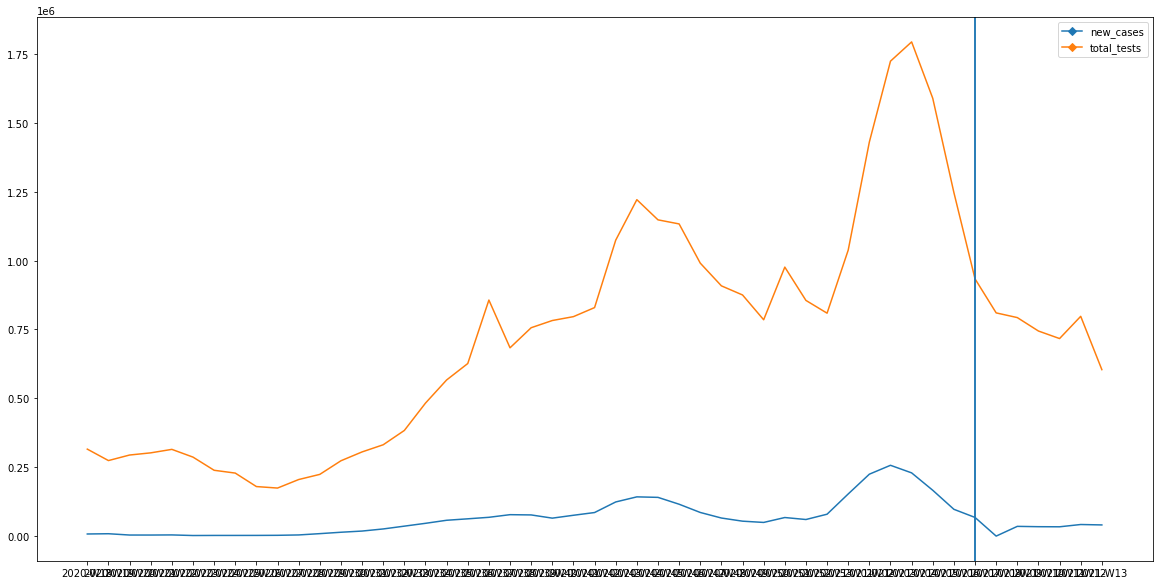

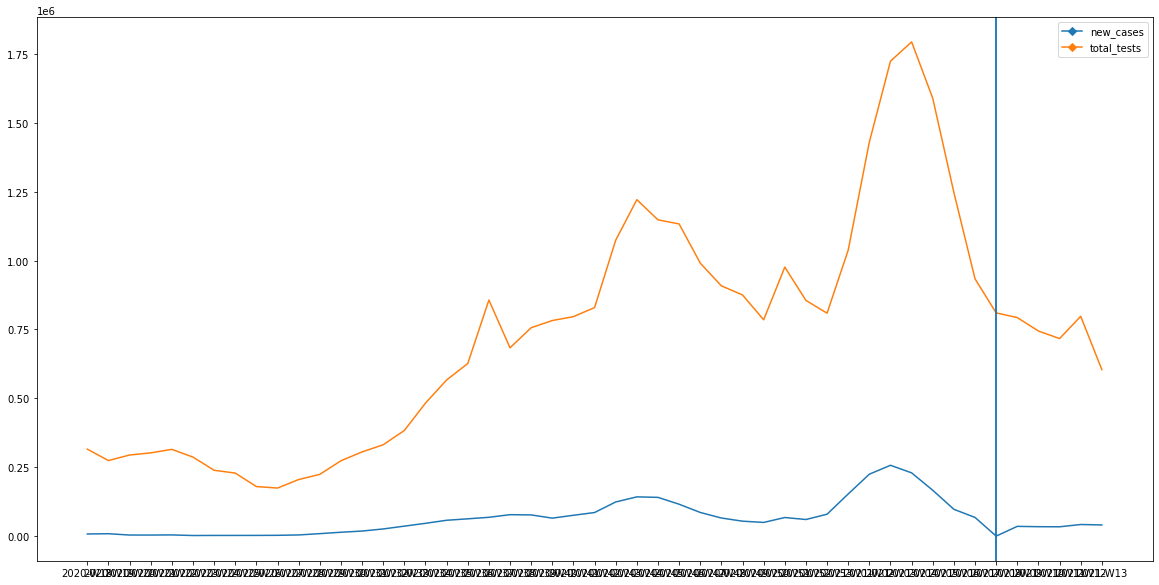

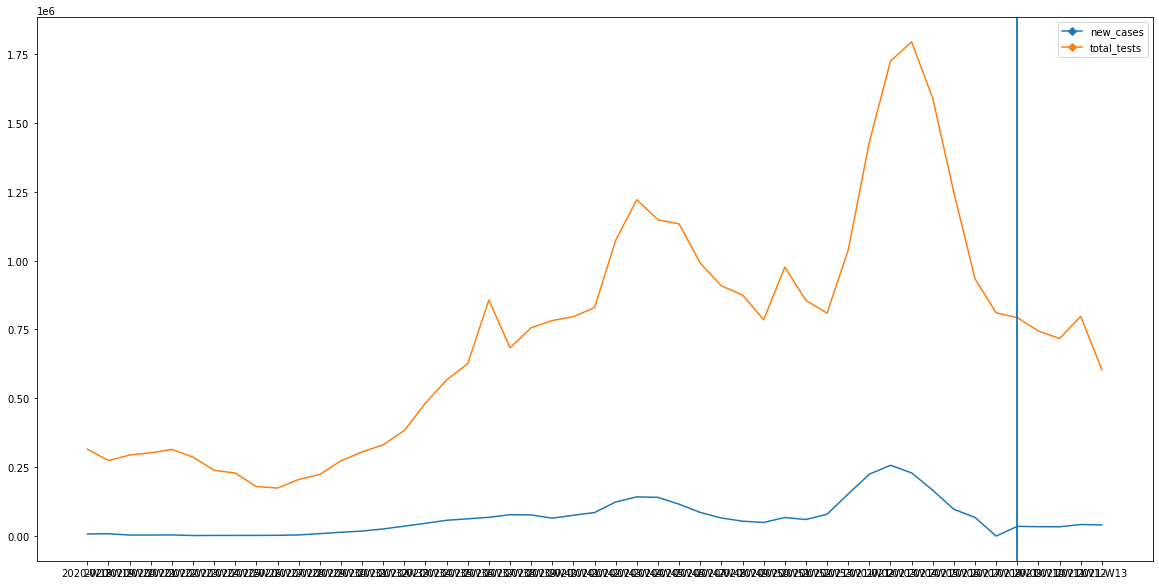

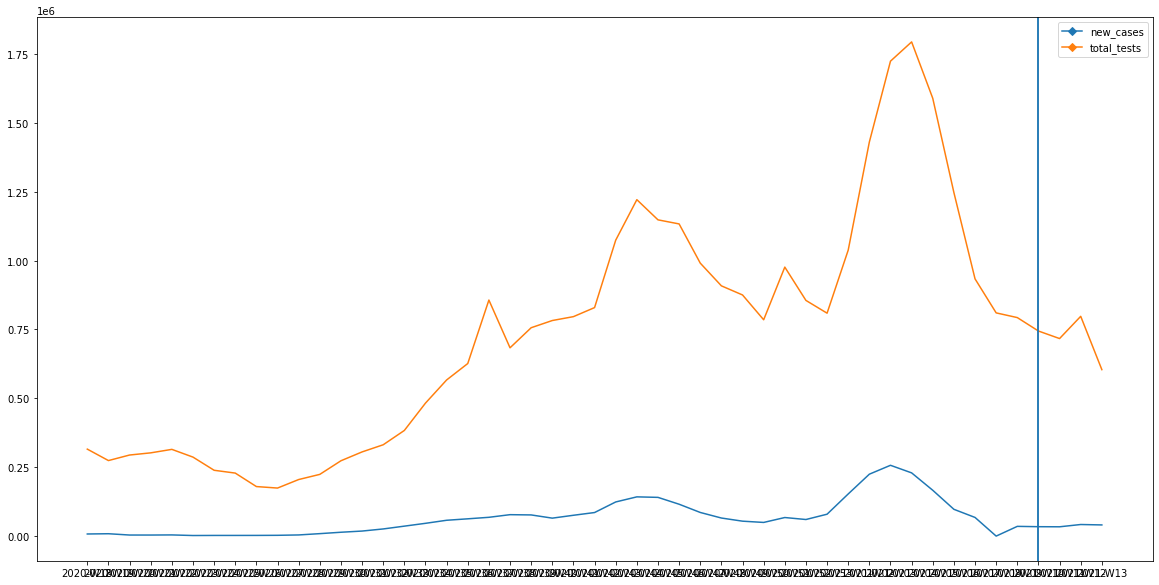

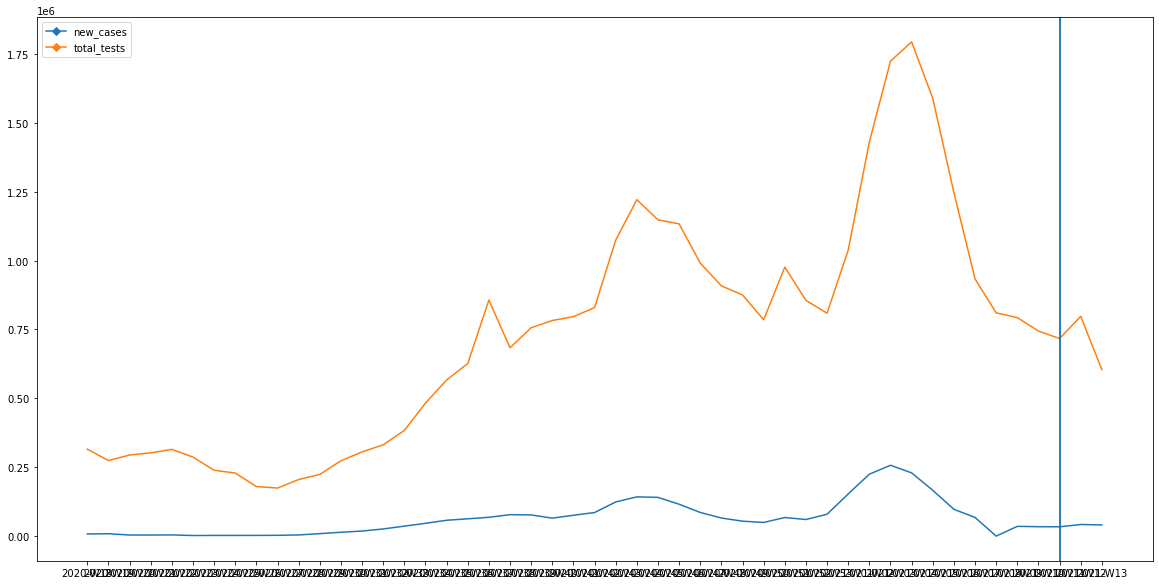

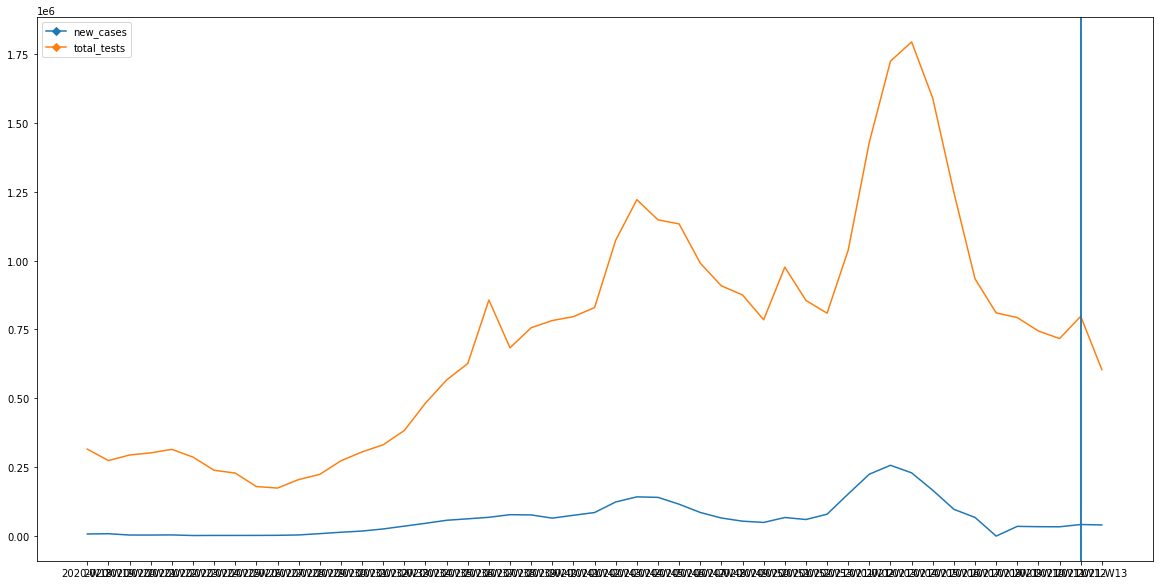

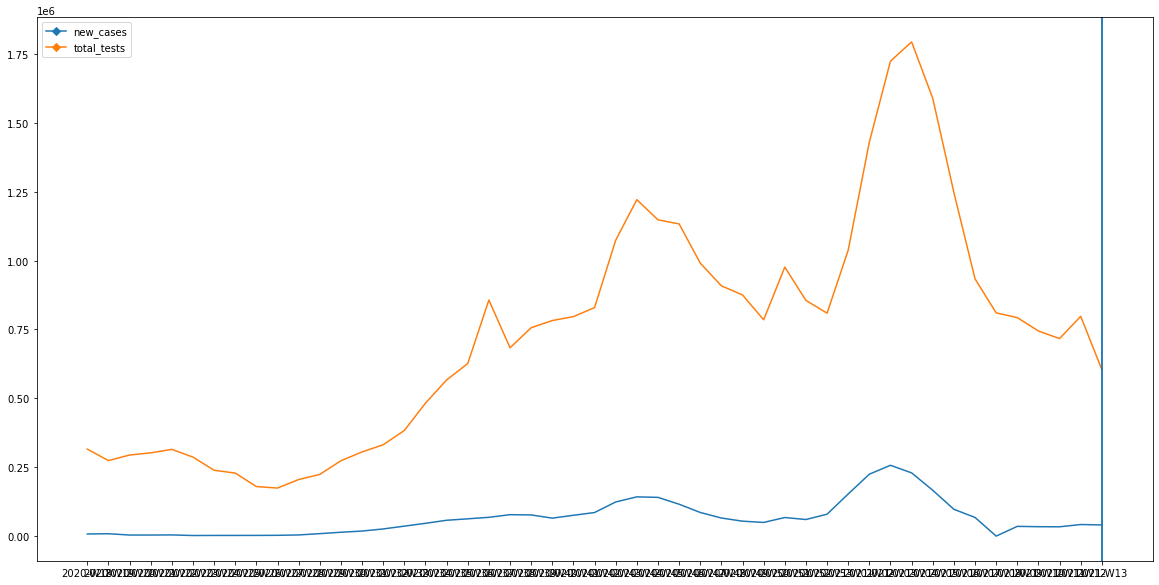

overlapped
total outliers: 34


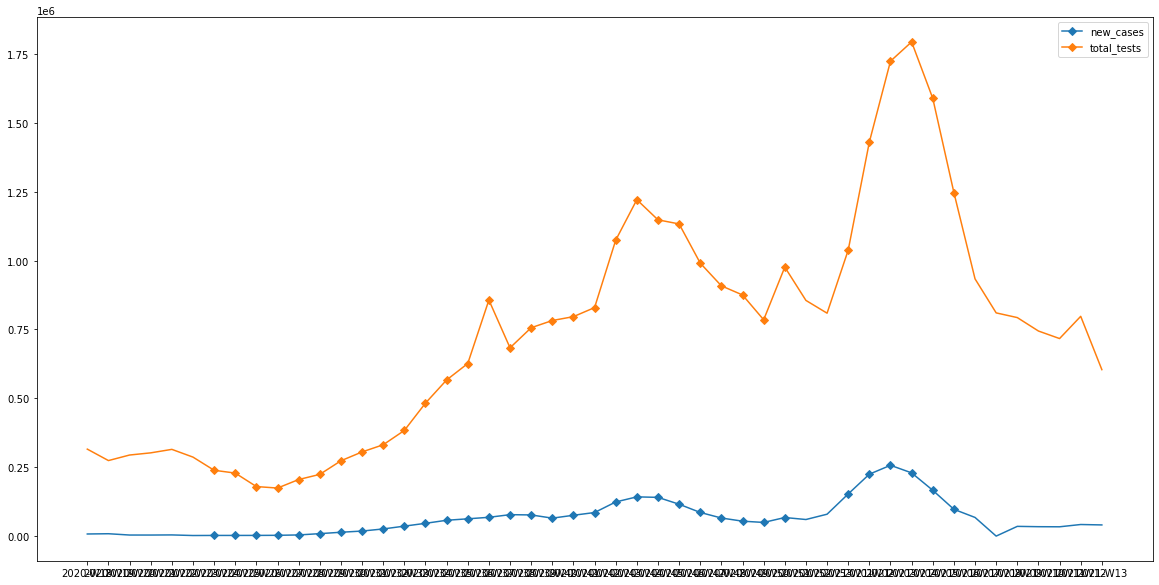

Wall time: 38.4 s


In [37]:
%%time
#fit on past, predict on current week
from sklearn.ensemble import IsolationForest

#split in chuncks of x days
chunck_size = 1
chuncks = split_dataframe(working_dataset, chunck_size)
total_indices = []
for index, current in enumerate(chuncks[1:], start=1):
    until_current = join_dataframe(chuncks[:index])
    clf = alg.fit(until_current)
    pred = clf.predict(current).tolist()
    indices = [num + index * chunck_size for num, element in enumerate(pred) if element == -1]
    total_indices.extend(indices)
    vertical_marks = []
    pyplot.plot(working_dataset, '-D', markevery=indices)
    try:
        start_incides = index * chunck_size
        end_incides = ( index + 1 ) * chunck_size - 1 
        vertical_marks = [working_dataset.iloc[start_incides].name, working_dataset.iloc[end_incides].name]
        pyplot.axvline(x=vertical_marks[0])
        pyplot.axvline(x=vertical_marks[1])
    except:
        pass
    pyplot.legend(['new_cases', 'total_tests'])
    pyplot.show()
    
print("overlapped")
print(f"total outliers: {len(total_indices)}")
pyplot.plot(working_dataset, '-D', markevery=total_indices)
pyplot.legend(['new_cases', 'total_tests'])
pyplot.show()


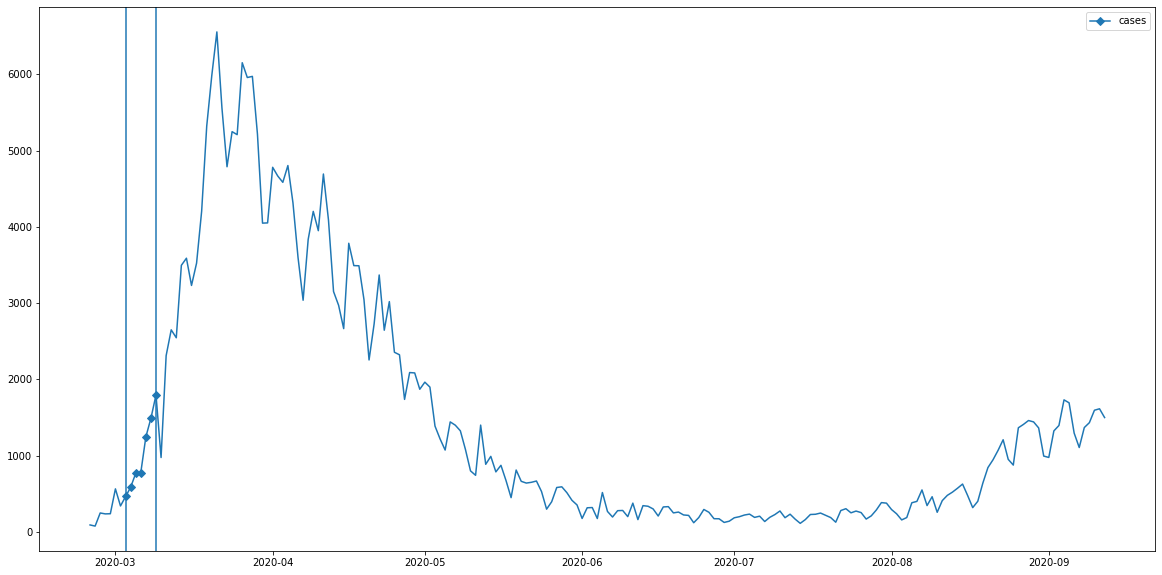

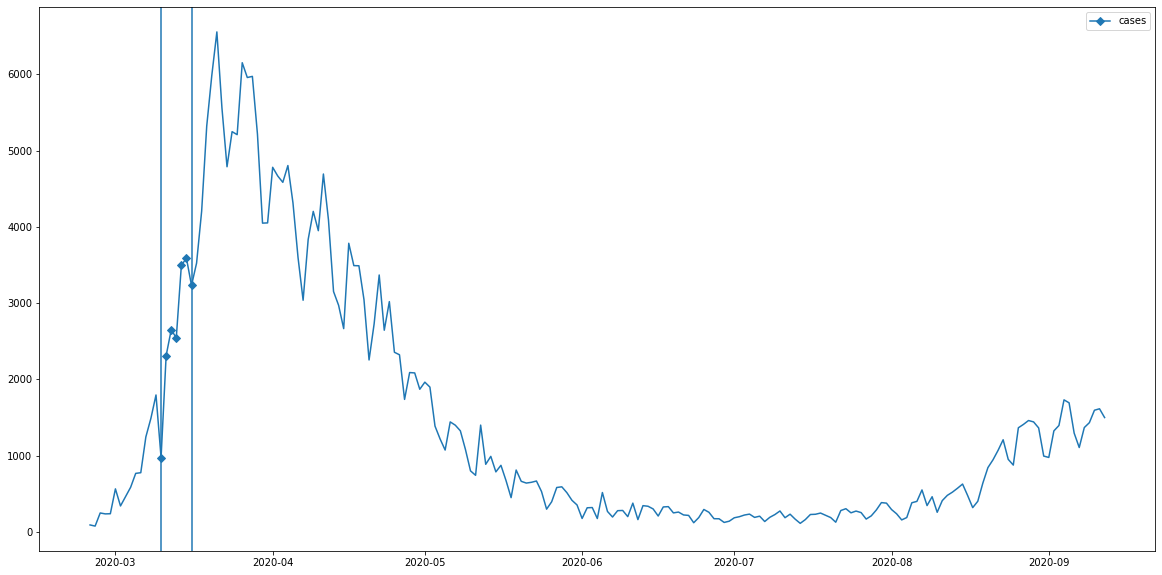

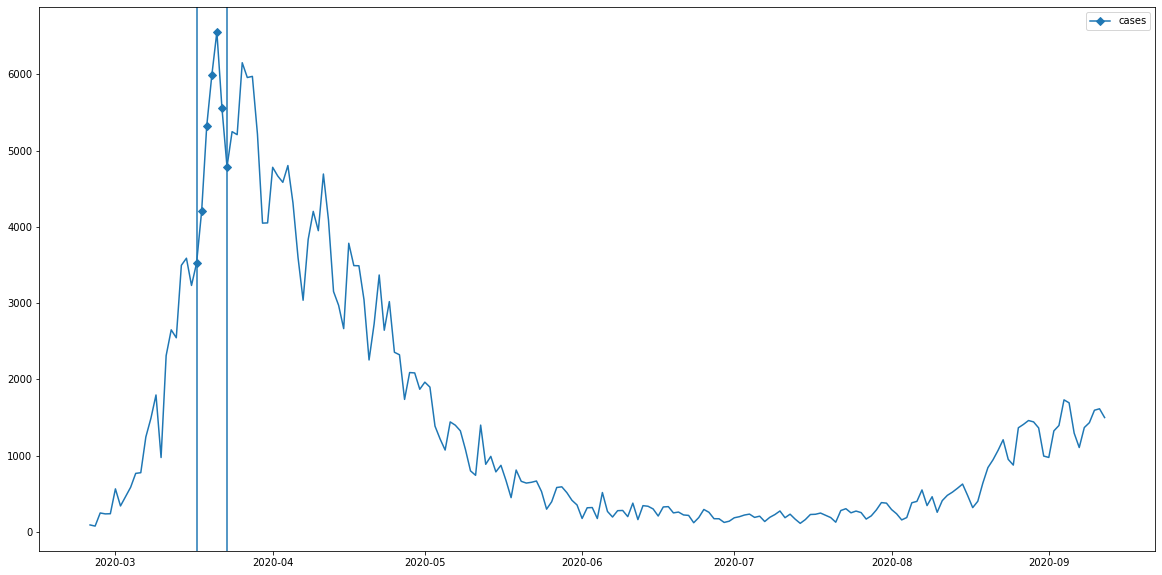

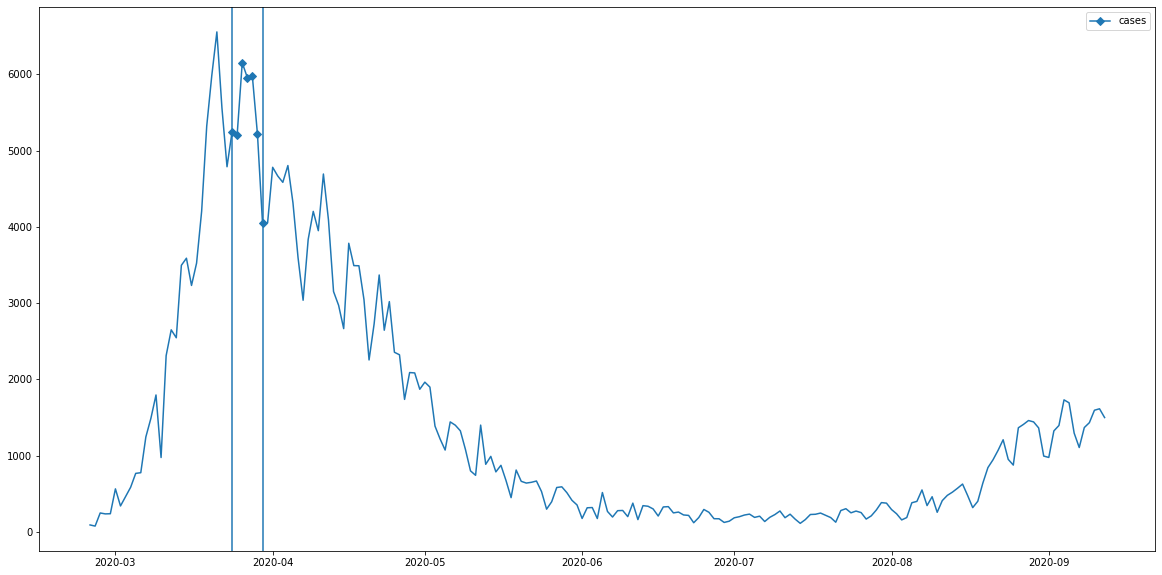

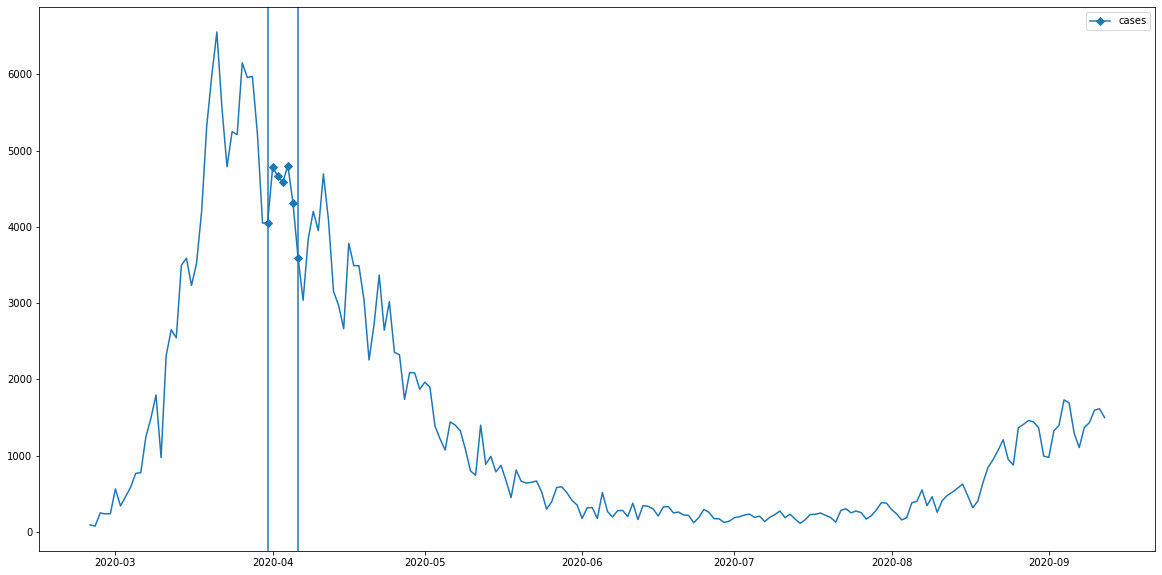

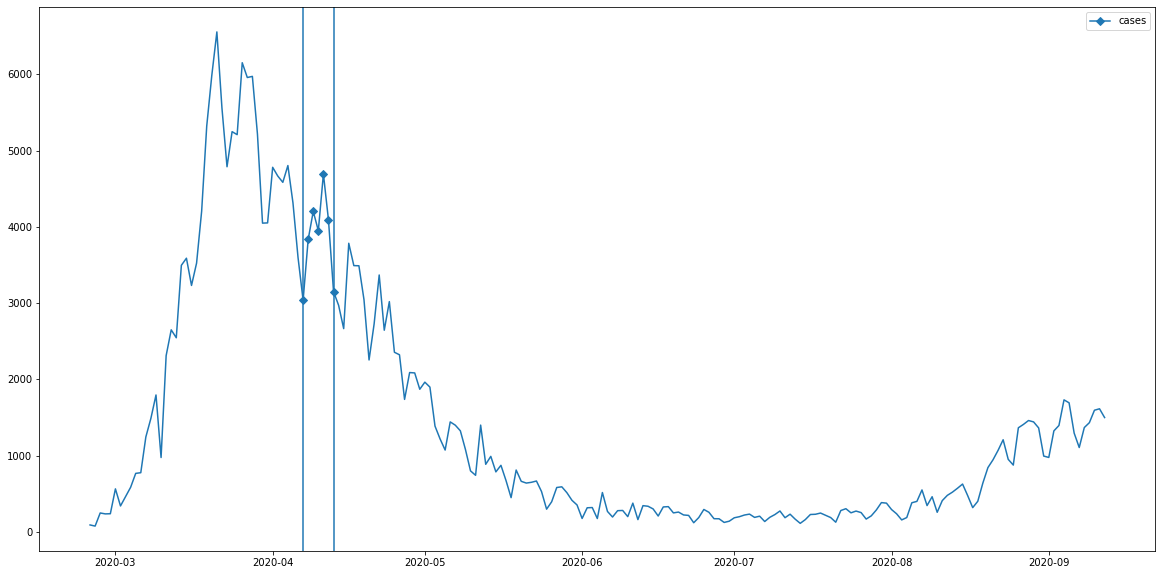

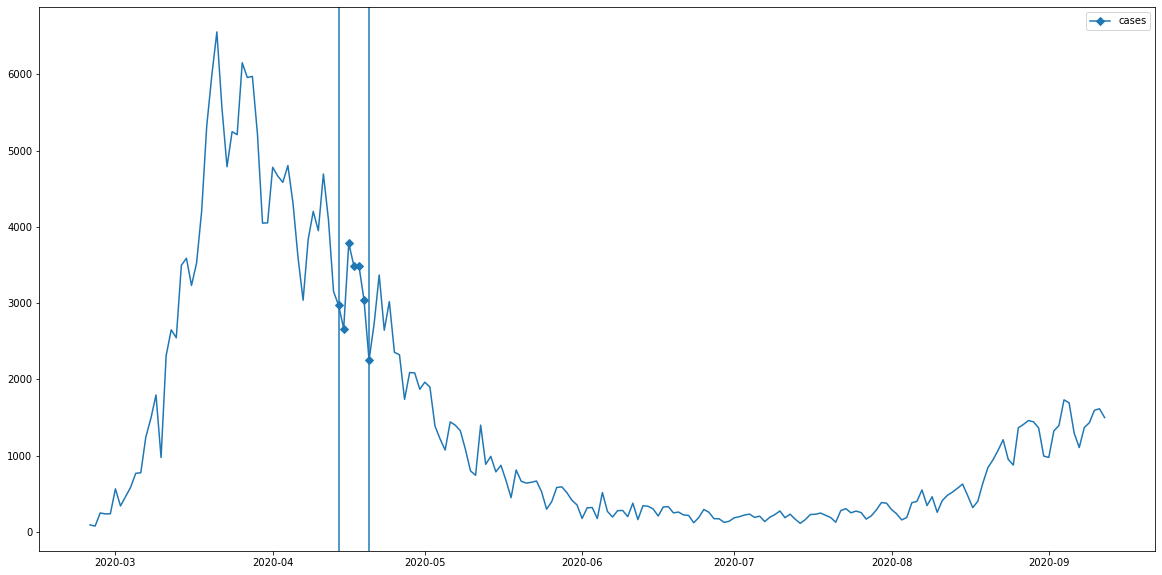

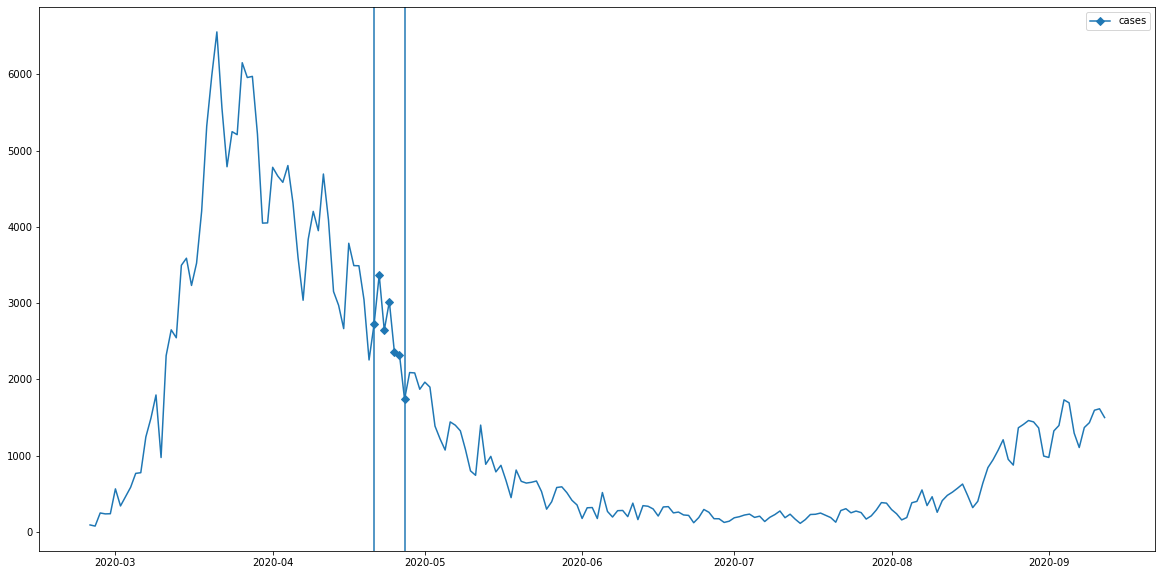

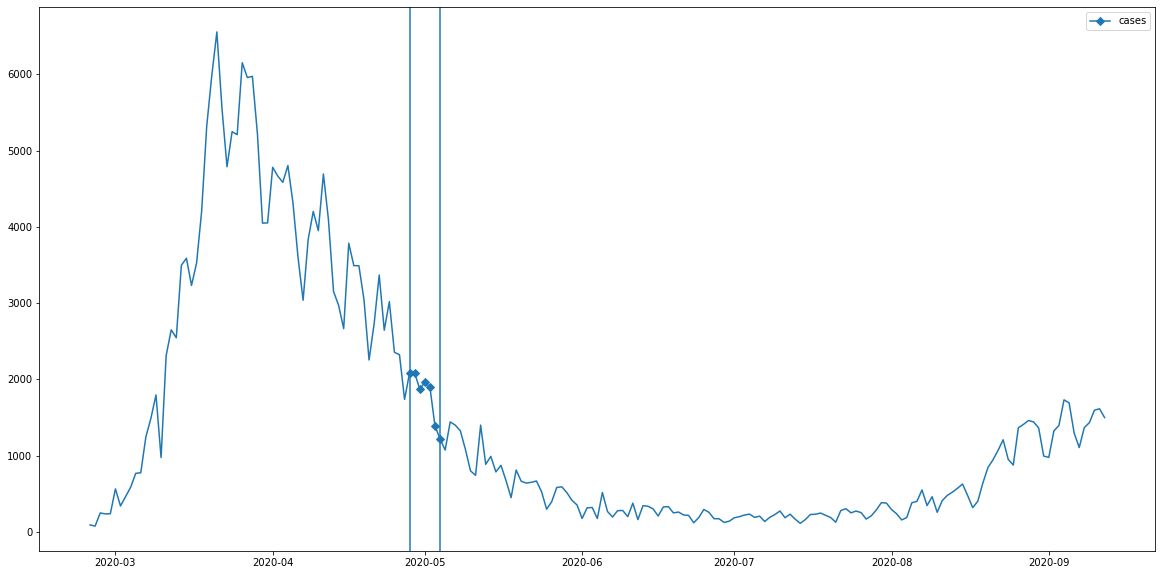

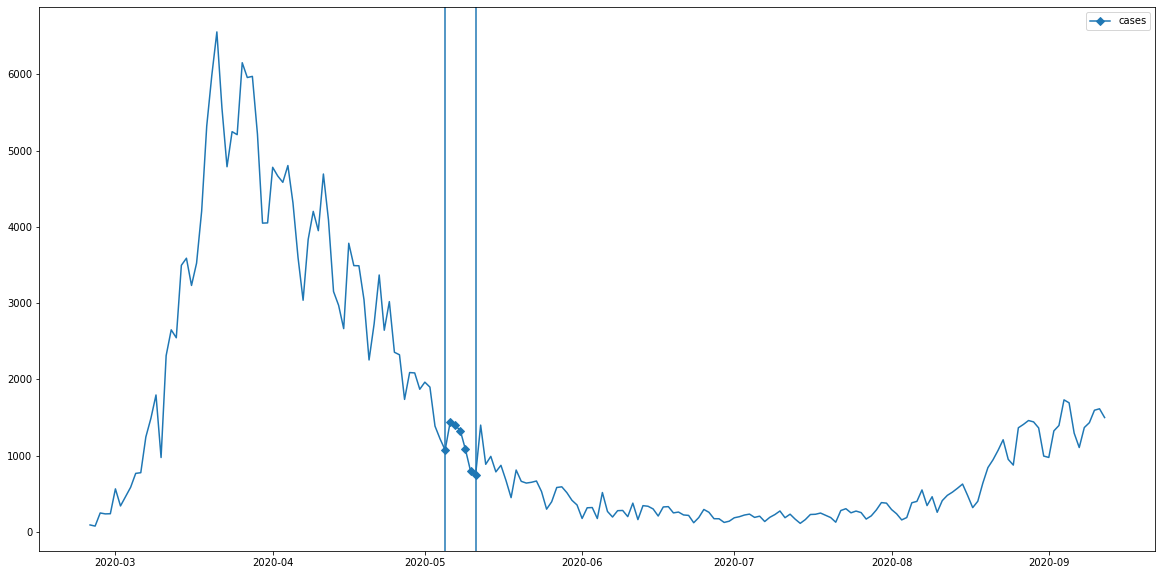

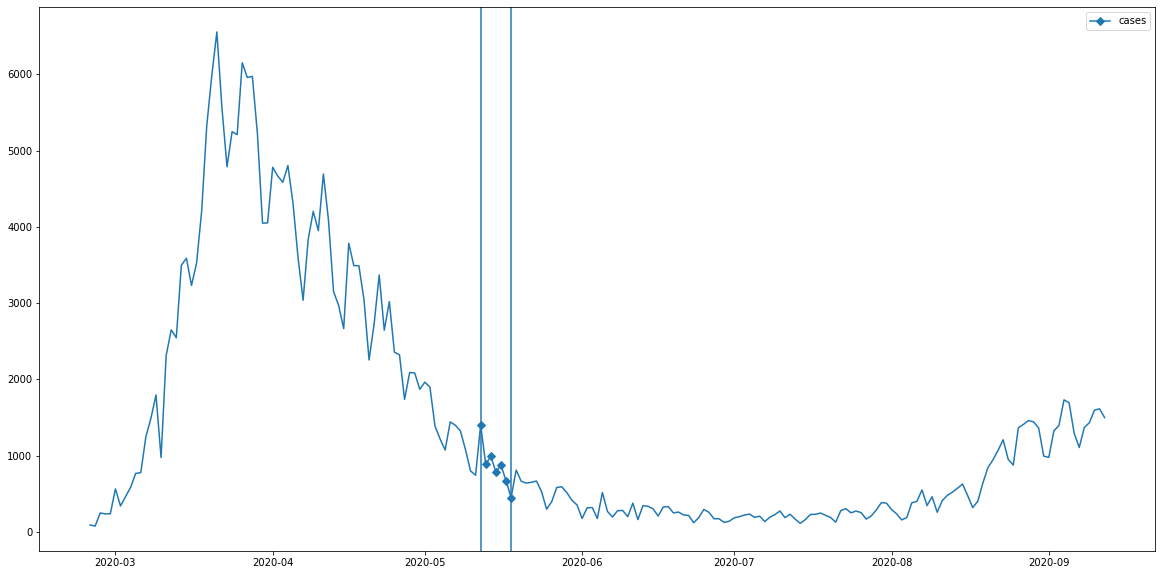

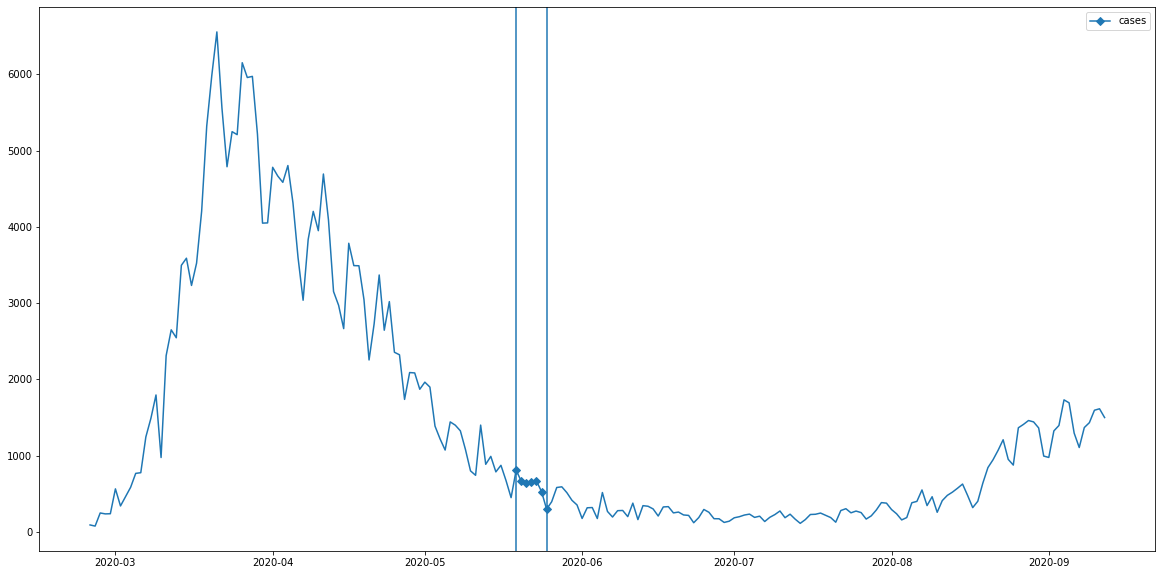

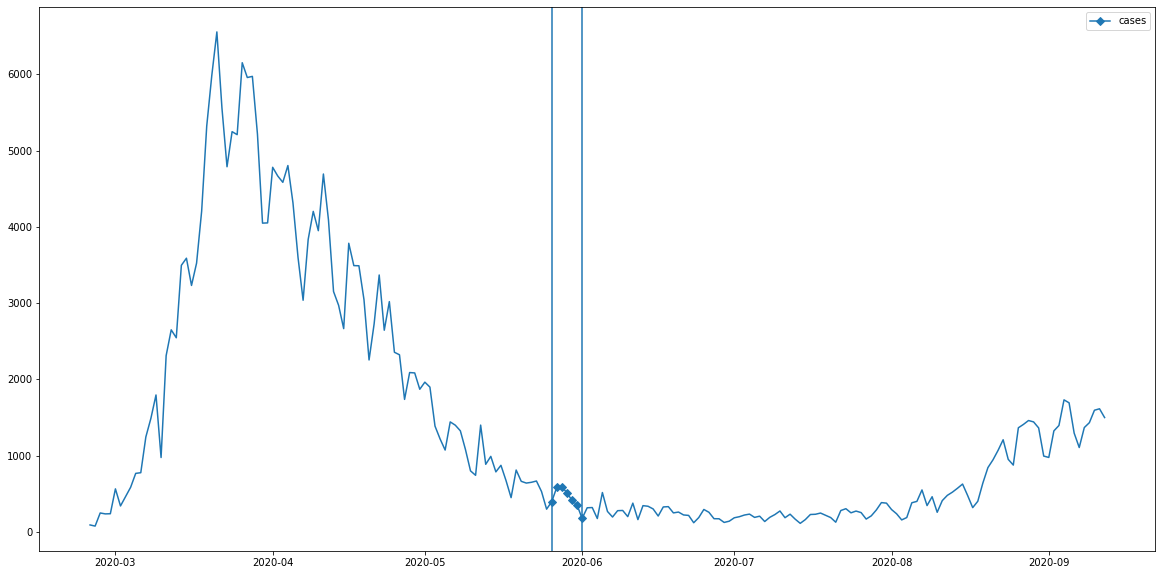

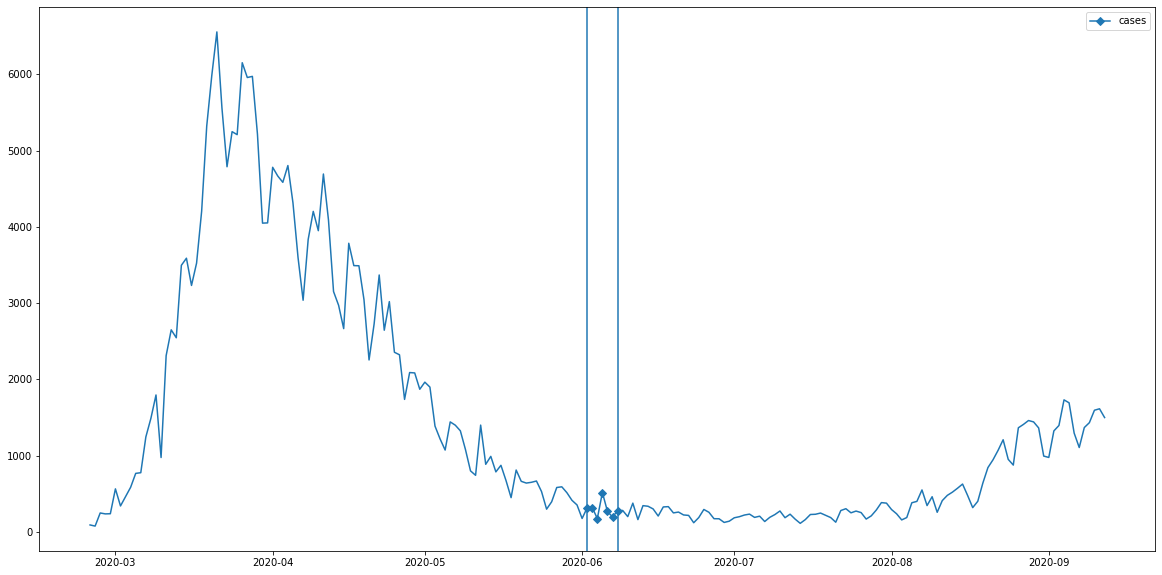

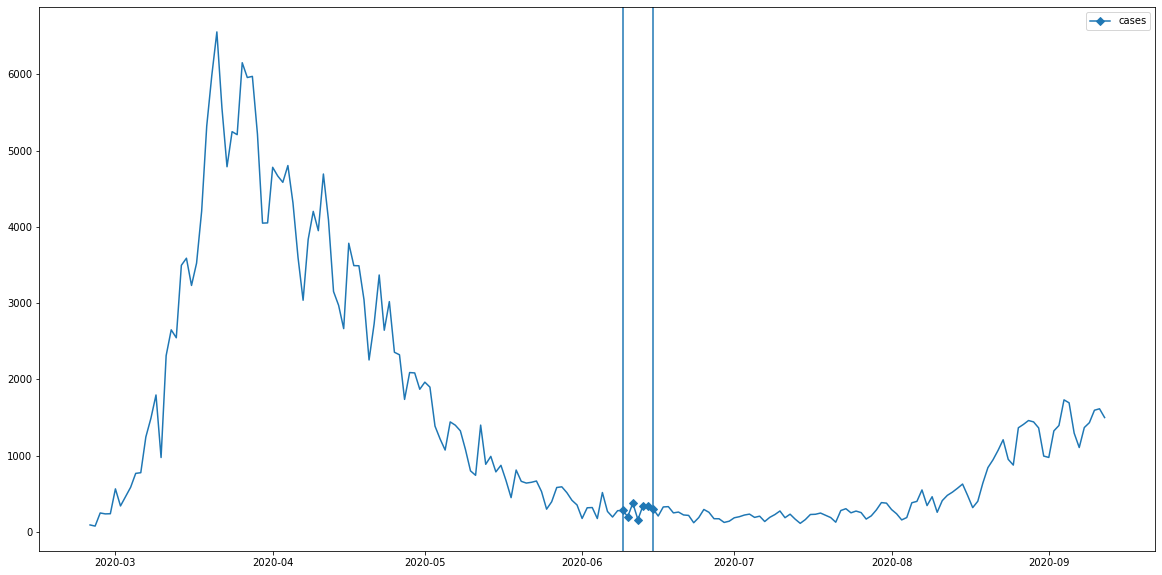

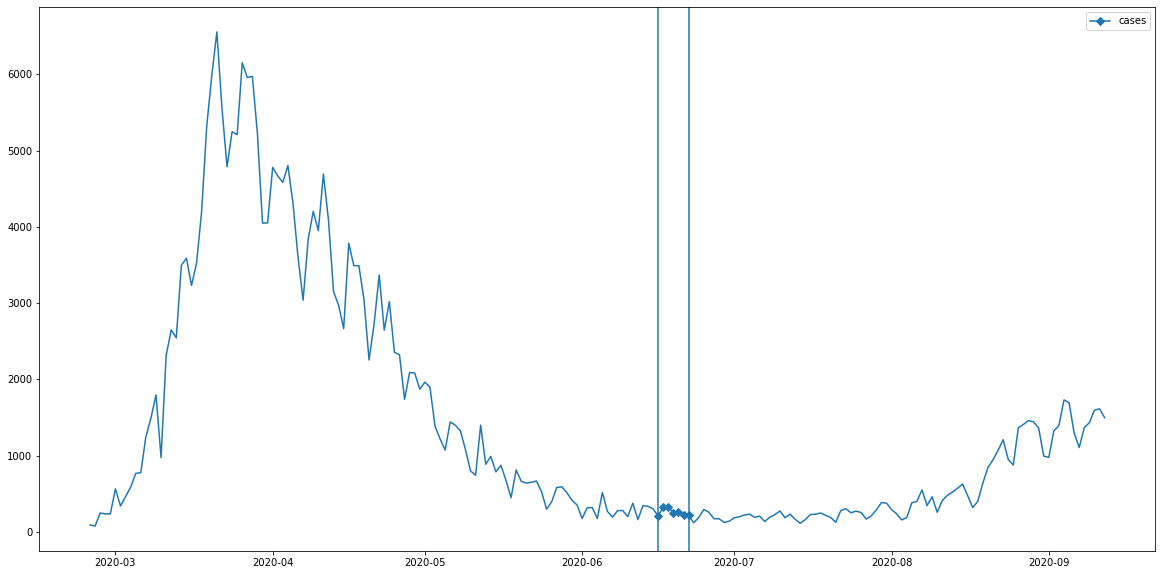

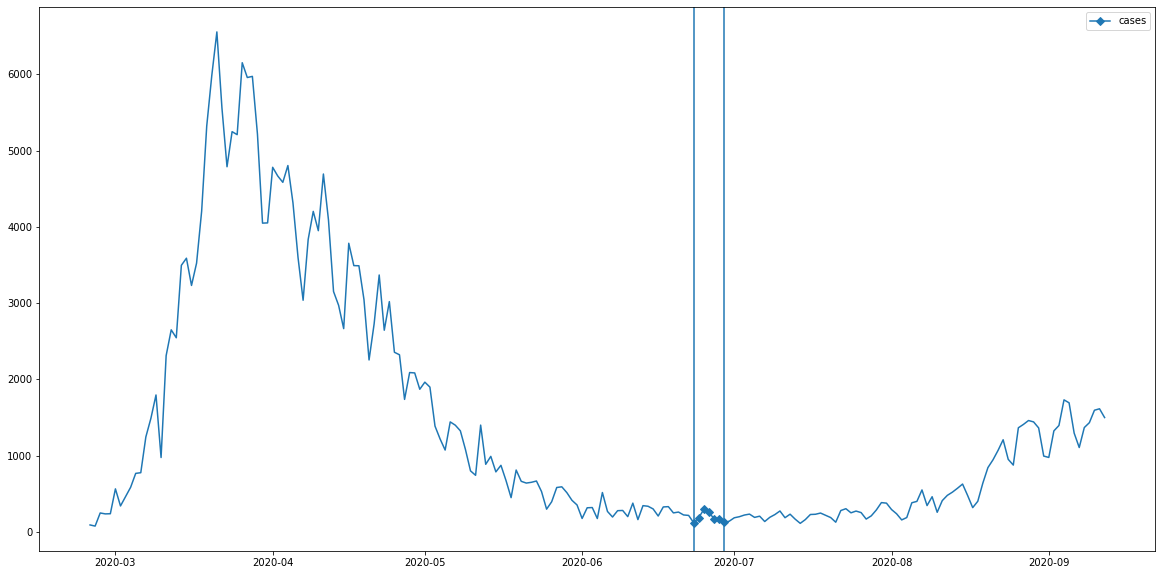

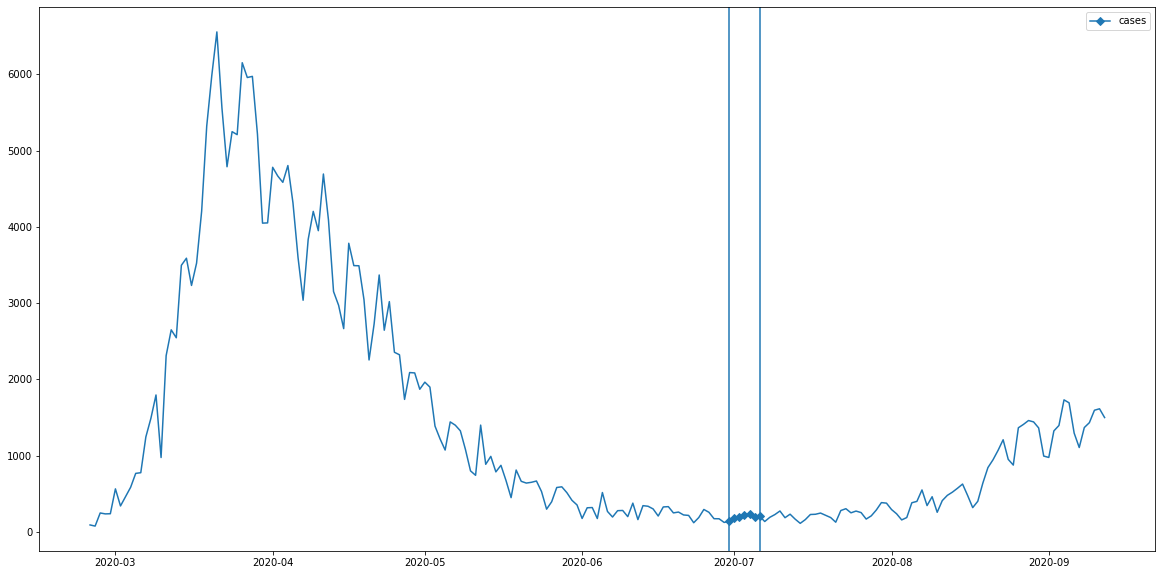

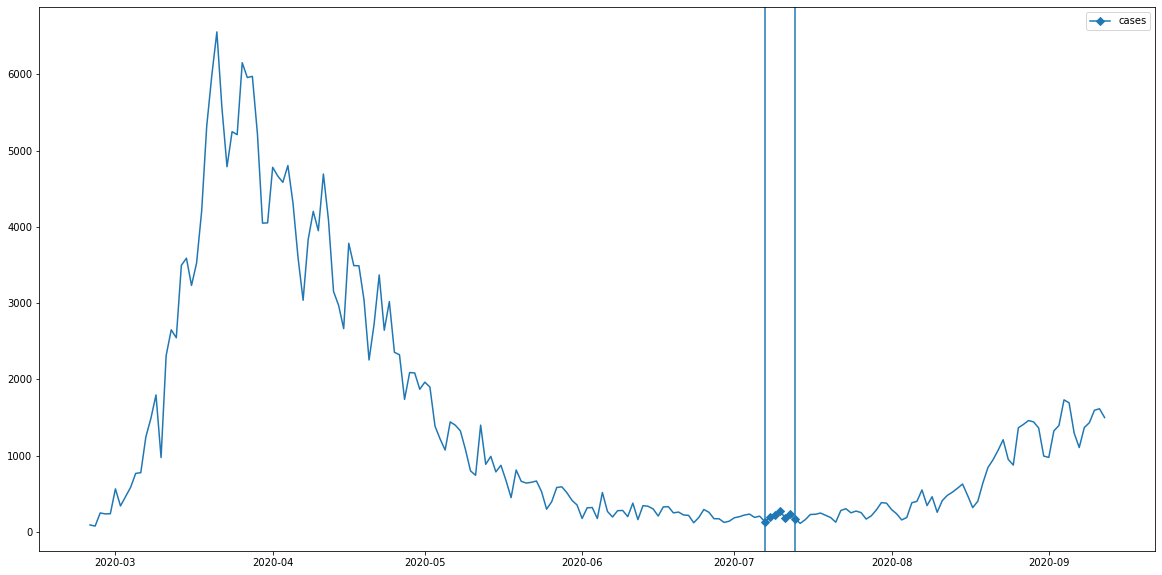

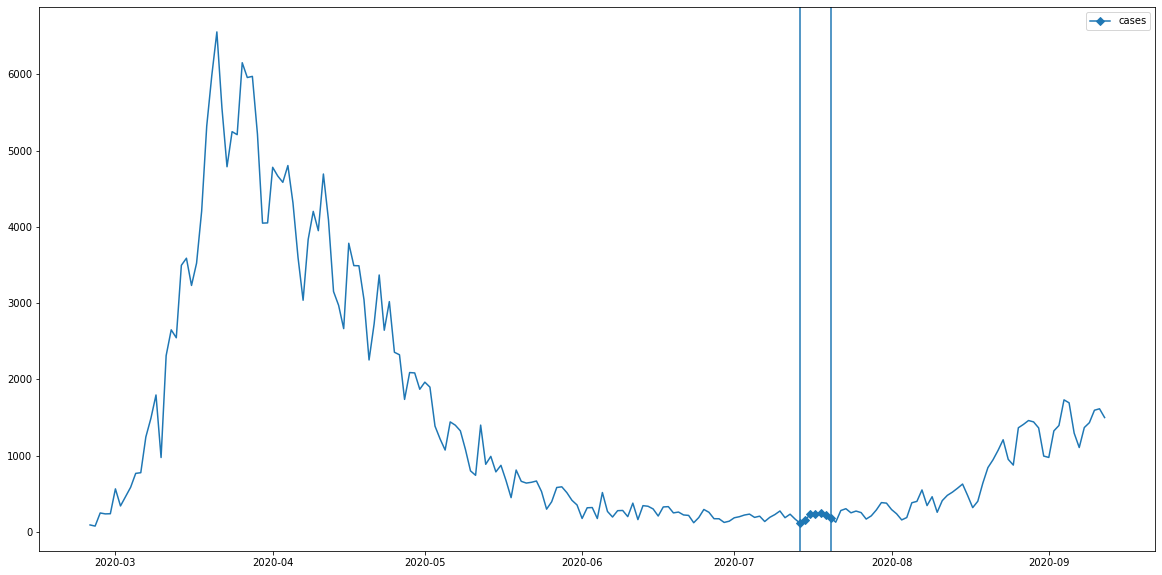

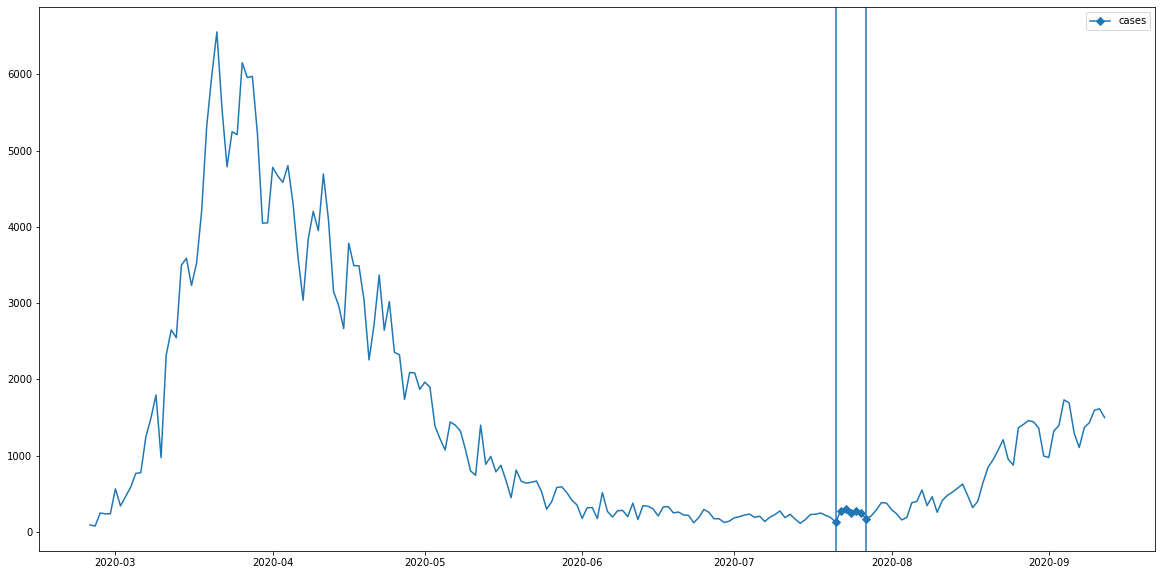

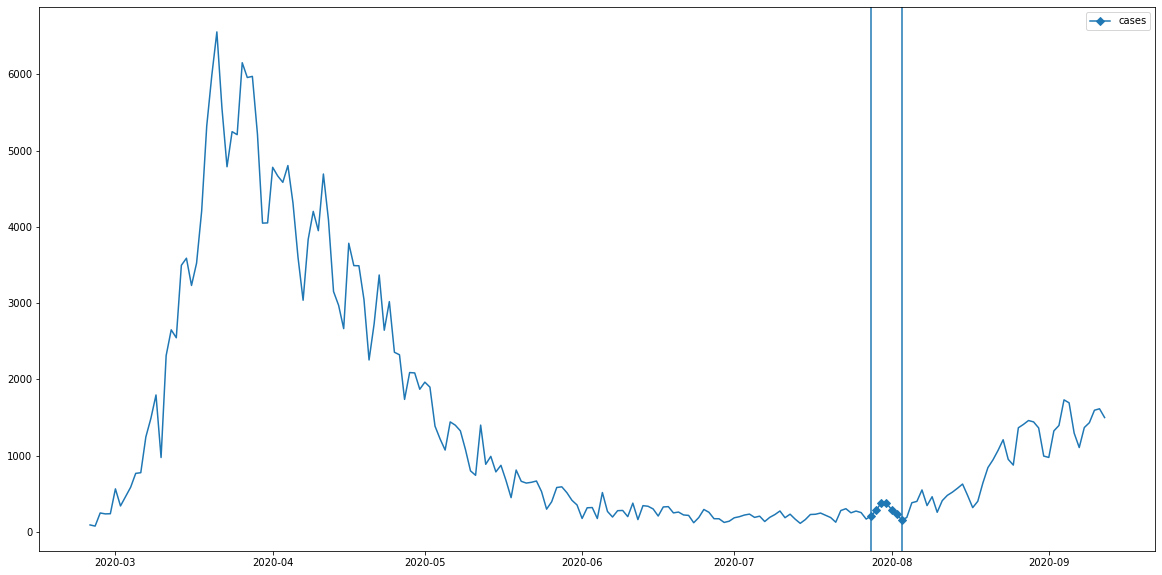

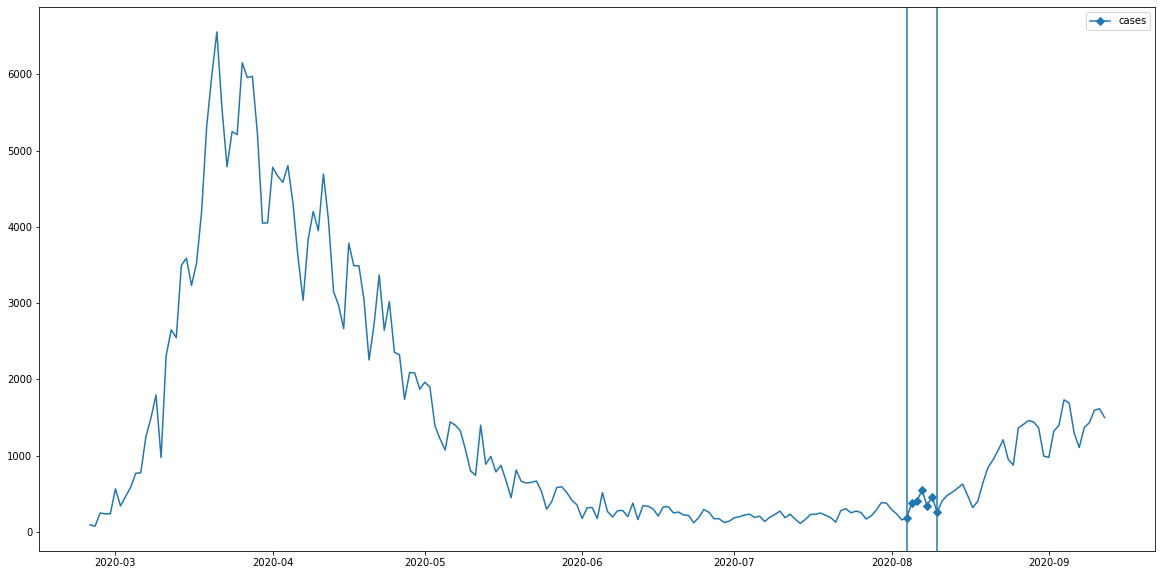

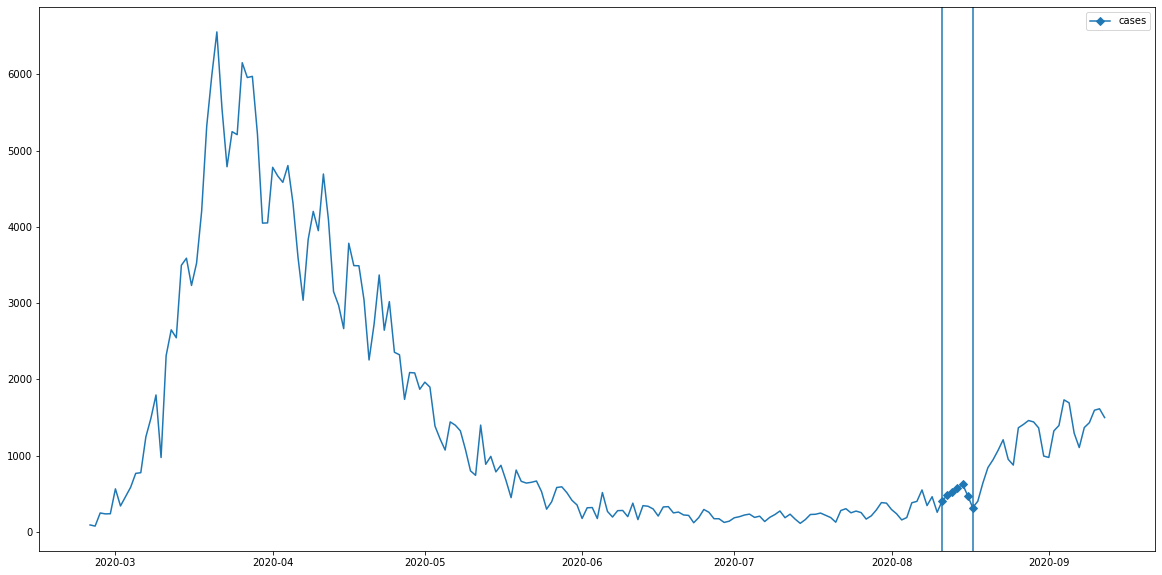

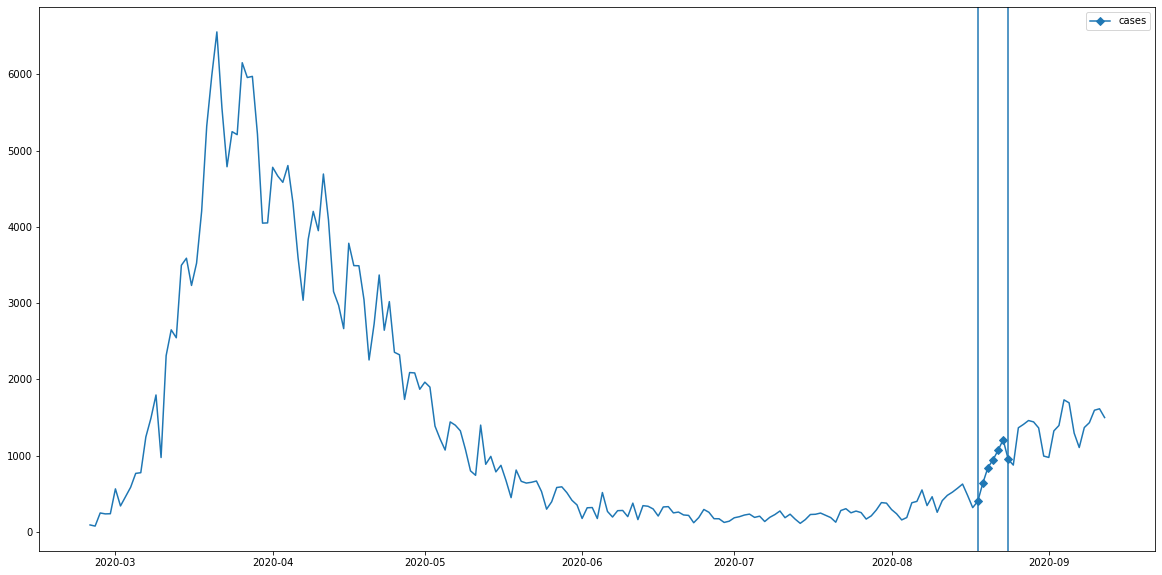

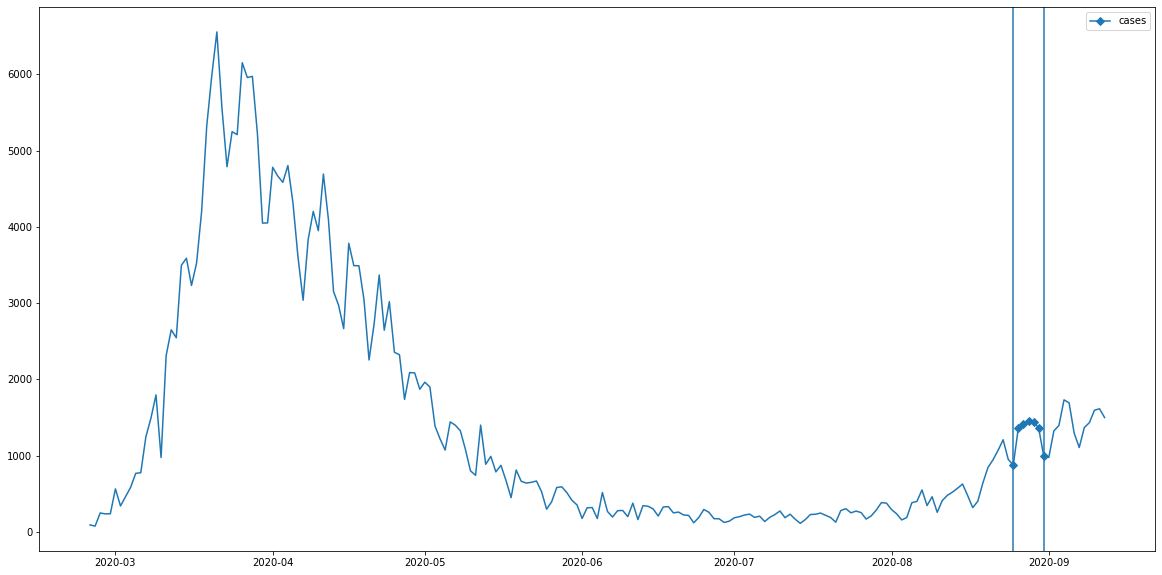

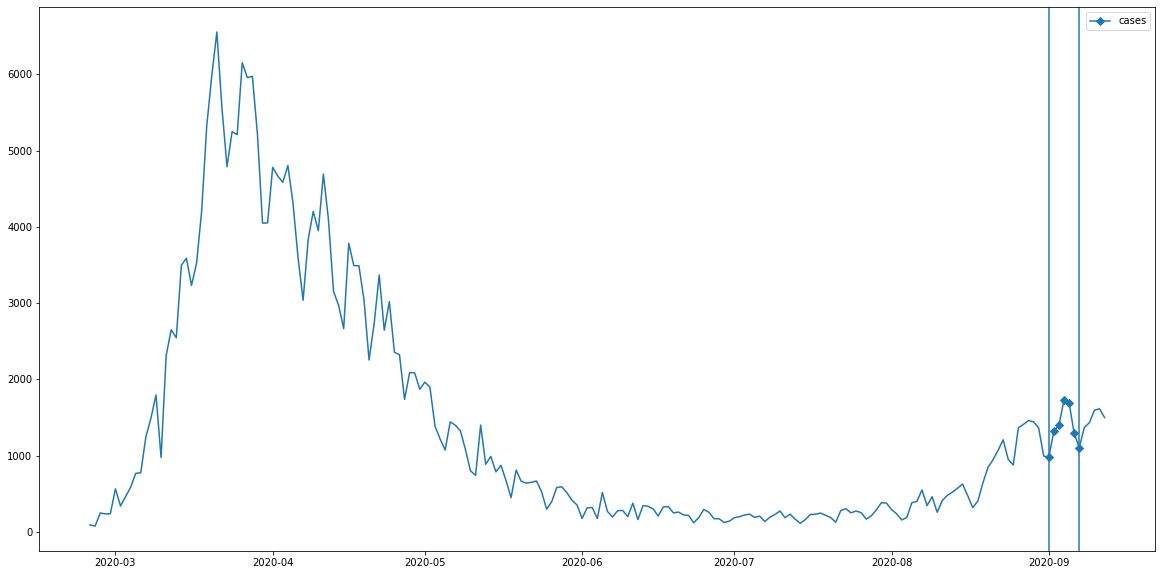

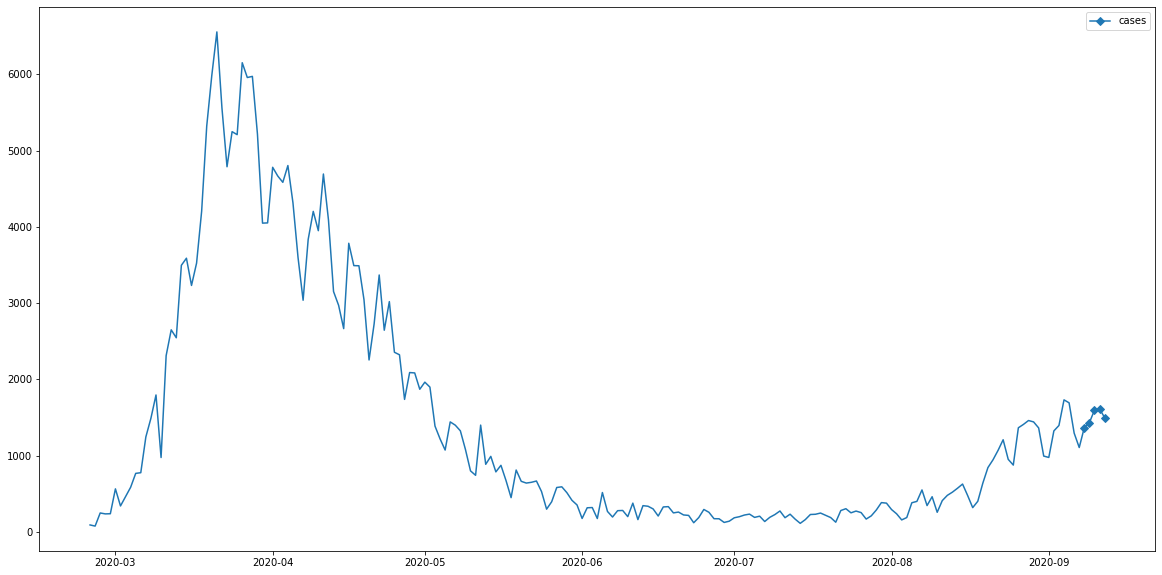

overlapped
total outliers: 194


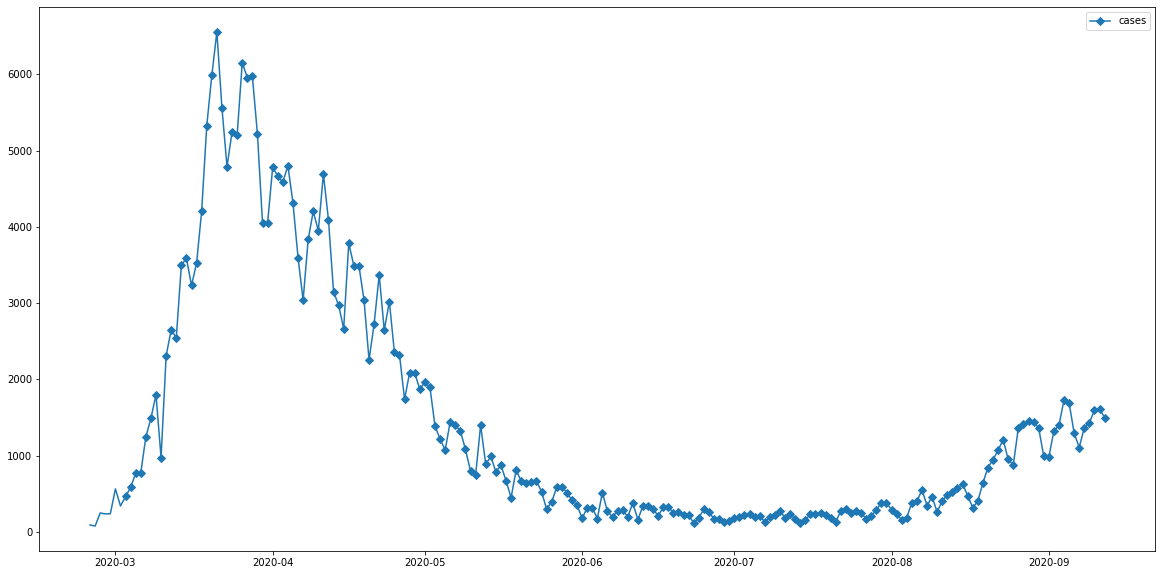

CPU times: user 14.5 s, sys: 3.04 s, total: 17.5 s
Wall time: 12.4 s


In [49]:

%%time
#fit on past, predict on current week with timestamp as input
from sklearn.ensemble import IsolationForest
dataset = datasets[dataset_number]
dataset_no_country = dataset[dataset['country']==country_code].copy().drop('country', axis='columns')
dataset_with_time = dataset_no_country.copy()
dataset_with_time['time']= dataset_with_time.index.values
dataset_with_time['time'] = dataset_with_time['time'].map(to_epoch)
dataset_with_time_no_deaths = dataset_with_time.copy().drop('deaths', axis='columns')
dataset_no_country_no_deaths = dataset_no_country.copy().drop('deaths', axis='columns')
#split in chuncks of x days
chunck_size = 7
chuncks = split_dataframe(dataset_with_time_no_deaths, chunck_size)
total_indices = []
for index, current in enumerate(chuncks[1:], start=1):
    until_current = join_dataframe(chuncks[:index])
    clf = IsolationForest(random_state=0).fit(until_current)
    pred = clf.predict(current).tolist()
    indices = [num + index * chunck_size for num, element in enumerate(pred) if element == -1]
    total_indices.extend(indices)
    vertical_marks = []
    pyplot.plot(dataset_no_country_no_deaths, '-D', markevery=indices)
    try:
        start_incides = index * chunck_size
        end_incides = ( index + 1 ) * chunck_size - 1 
        vertical_marks = [dataset_no_country_no_deaths.iloc[start_incides].name, dataset_no_country_no_deaths.iloc[end_incides].name]
        pyplot.axvline(x=vertical_marks[0])
        pyplot.axvline(x=vertical_marks[1])
    except:
        pass
    pyplot.legend(['cases'])
    pyplot.show()
    
print("overlapped")
print(f"total outliers: {len(total_indices)}")
pyplot.plot(dataset_no_country_no_deaths, '-D', markevery=total_indices)
pyplot.legend(['cases'])
pyplot.show()